In [1375]:
import pandas as pd
from pandas.io.json import build_table_schema
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import scipy as sp
import os
import xgboost as xgb
import visualization as vis
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

DIR_PATH = './'

In [1376]:
# show all output and more columns and rows
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = 410
pd.options.display.max_rows = 2000

In [936]:
trainXGB=pd.read_csv('trainXGB.csv')
testXGB=pd.read_csv('testXGB.csv')

In [937]:
macro = pd.read_csv( 'macro.csv',header='infer')


In [940]:
trainXGB.shape
testXGB.shape

(30470, 45)

(7662, 42)

In [943]:
macroID.shape

(101, 2)

In [942]:
macroID.to_csv('macroID.csv', index=0)

In [941]:
macroID = pd.read_csv('macroid.txt',sep=':',header=None)
macroID.columns=['Predictor', 'Description']
macroID

Predictor  \
0                                     timestamp   
1                                     oil_urals   
2                                     gdp_quart   
3                              gdp_quart_growth   
4                                           cpi   
5                                           ppi   
6                                  gdp_deflator   
7                                 balance_trade   
8                          balance_trade_growth   
9                                        usdrub   
10                                       eurrub   
11                                        brent   
12                           net_capital_export   
13                                   gdp_annual   
14                            gdp_annual_growth   
15          average_provision_of_build_contract   
16   average_provision_of_build_contract_moscow   
17                                          rts   
18                                        micex   
19                                micex_rgbi_tr   
20                                 micex_cbi_tr   
21                               deposits_value   
22                              deposits_growth   
23                                deposits_rate   
24                               mortgage_value   
25                              mortgage_growth   
26                                mortgage_rate   
27                                          grp   
28                                   grp_growth   
29                               income_per_cap   
30            real_dispos_income_per_cap_growth   
31                                       salary   
32                                salary_growth   
33                                 fixed_basket   
34                        retail_trade_turnover   
35                retail_trade_turnover_per_cap   
36                 retail_trade_turnover_growth   
37                                  labor_force   
38                                 unemployment   
39                                   employment   
40                 invest_fixed_capital_per_cap   
41                          invest_fixed_assets   
42                     profitable_enterpr_share   
43                   unprofitable_enterpr_share   
44                           share_own_revenues   
45                        overdue_wages_per_cap   
46                              fin_res_per_cap   
47                       marriages_per_1000_cap   
48                                 divorce_rate   
49                           construction_value   
50                     invest_fixed_assets_phys   
51                         pop_natural_increase   
52                                pop_migration   
53                                pop_total_inc   
54                                   childbirth   
55                                    mortality   
56                             housing_fund_sqm   
57                          lodging_sqm_per_cap   
58                            water_pipes_share   
59                                  baths_share   
60                               sewerage_share   
61                                    gas_share   
62                              hot_water_share   
63                         electric_stove_share   
64                                heating_share   
65                              old_house_share   
66                             average_life_exp   
67                infant_mortarity_per_1000_cap   
68                  perinatal_mort_per_1000_cap   
69                         incidence_population   
70                        rent_price_4+room_bus   
71                         rent_price_3room_bus   
72                         rent_price_2room_bus   
73                         rent_price_1room_bus   
74                         rent_price_3room_eco   
75                         rent_price_2room_eco   
76                         rent_price_1room_eco   
77       load_of_teachers_preschool_per_teacher   
78       

In [944]:
macro.head()
macro.size
macro.shape

timestamp  oil_urals  gdp_quart  gdp_quart_growth  cpi  ppi  gdp_deflator  \
0  2010-01-01       76.1        NaN               NaN  NaN  NaN           NaN   
1  2010-01-02       76.1        NaN               NaN  NaN  NaN           NaN   
2  2010-01-03       76.1        NaN               NaN  NaN  NaN           NaN   
3  2010-01-04       76.1        NaN               NaN  NaN  NaN           NaN   
4  2010-01-05       76.1        NaN               NaN  NaN  NaN           NaN   

   balance_trade  balance_trade_growth  usdrub   eurrub  brent  \
0            NaN                   NaN     NaN      NaN    NaN   
1            NaN                   NaN     NaN      NaN    NaN   
2            NaN                   NaN     NaN      NaN    NaN   
3            NaN                   NaN  29.905  43.4054  80.12   
4            NaN                   NaN  29.836  42.9600  80.59   

   net_capital_export  gdp_annual  gdp_annual_growth  \
0                 NaN     38807.2          -0.078209   
1                 NaN     38807.2          -0.078209   
2                 NaN     38807.2          -0.078209   
3                 NaN     38807.2          -0.078209   
4                 NaN     38807.2          -0.078209   

   average_provision_of_build_contract  \
0                                  5.0   
1                                  5.0   
2                                  5.0   
3                                  5.0   
4                                  5.0   

   average_provision_of_build_contract_moscow  rts  micex  micex_rgbi_tr  \
0                                         NaN  NaN    NaN            NaN   
1                                         NaN  NaN    NaN            NaN   
2                                         NaN  NaN    NaN            NaN   
3                                         NaN  NaN    NaN            NaN   
4                                         NaN  NaN    NaN            NaN   

   micex_cbi_tr  deposits_value  deposits_growth  deposits_rate  \
0           NaN         7484970              NaN            NaN   
1        175.15         7484970              NaN            NaN   
2        178.66         7484970              NaN            NaN   
3        183.44         7484970              NaN            NaN   
4        183.44         7484970              NaN            NaN   

   mortgage_value  mortgage_growth  mortgage_rate        grp  grp_growth  \
0          142968              NaN          13.72  8375.8638         NaN   
1          142968              NaN          13.72  8375.8638         NaN   
2          142968              NaN          13.72  8375.8638         NaN   
3          142968              NaN          13.72  8375.8638         NaN   
4          142968              NaN          13.72  8375.8638         NaN   

   income_per_cap  real_dispos_income_per_cap_growth   salary  salary_growth  \
0         30789.2                              0.038  38410.5            NaN   
1         30789.2                              0.038  38410.5            NaN   
2         30789.2                              0.038  38410.5            NaN   
3         30789.2                              0.038  38410.5            NaN   
4         30789.2                              0.038  38410.5            NaN   

   fixed_basket  retail_trade_turnover  retail_trade_turnover_per_cap  \
0      11443.63              2882.4169                        251.484   
1      11443.63              2882.4169                        251.484   
2      11443.63              2882.4169                        251.484   
3      11443.63              2882.4169                        251.484   
4      11443.63              2882.4169                        251.484   

   retail_trade_turnover_growth  labor_force  unemployment  employment  \
0                         106.8     6436.244         0.018        0.69   
1                         106.8     6436.244         0.018        0.69   
2                         106.8     6436.244         0.018        0.69 

248400

(2484, 100)

In [1377]:
train300=pd.read_csv('train.csv')
test300=pd.read_csv('test.csv')

In [1378]:
train300.shape
test300.shape

(30470, 298)

(7662, 295)

In [959]:
macro.shape

(2484, 100)

In [1320]:
trainall=pd.merge(train300, macro, how='left', on ='timestamp')
testall=pd.merge(test300, macro, how='left', on ='timestamp')
trainall.shape
testall.shape

(30470, 397)

(7662, 394)

In [1321]:
trainall.to_csv('trainallnew.csv',index=0)
testall.to_csv('testallnew.csv',index=0)

In [44]:
trainnew=pd.merge(trainXGB, macro, how='left', on ='timestamp')
testnew=pd.merge(testXGB, macro, how='left', on ='timestamp')
trainnew.shape
testnew.shape

(30470, 144)

(7662, 141)

In [45]:
trainnew.to_csv('trainnew.csv',index=0)
testnew.to_csv('testnew.csv',index=0)

In [947]:
trainnew=pd.read_csv('trainnew.csv')
testnew=pd.read_csv('testnew.csv')

In [948]:
trainnew.head()

timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0  2011-08-20     43.0     27.0    4.0        NaN       NaN         NaN   
1  2011-08-23     34.0     19.0    3.0        NaN       NaN         NaN   
2  2011-08-27     43.0     29.0    2.0        NaN       NaN         NaN   
3  2011-09-01     89.0     50.0    9.0        NaN       NaN         NaN   
4  2011-09-05     77.0     77.0    4.0        NaN       NaN         NaN   

   num_room  kitch_sq  state  product_type_le  sub_area_le  \
0       NaN       NaN    NaN                0            1   
1       NaN       NaN    NaN                0           27   
2       NaN       NaN    NaN                0           53   
3       NaN       NaN    NaN                0           25   
4       NaN       NaN    NaN                0           59   

   build_count_monolith  public_healthcare_km  additional_education_km  \
0                   2.0              0.974743                 0.947962   
1                   4.0              1.477723                 1.072315   
2                   4.0              0.097144                 0.391957   
3                  50.0              2.163735                 0.892674   
4                  16.0              1.121703                 0.810801   

   workplaces_km  big_church_km  mosque_km  full_all  male_f  0_17_female  \
0       0.884350       0.625783   3.932040     86206   40477        11317   
1       0.686252       0.967821   4.841544     76284   34200         8702   
2       1.510089       3.178751   7.922152    101982   46076         7063   
3       0.622272       1.031777  15.300449     21155    9828        15550   
4       0.892668       0.378756   2.584370     28179   13522         7124   

   16_29_female  big_road2_km     ttk_km  incineration_raion_le  \
0          8083      3.830951  10.918587                      0   
1          7593      3.103996   3.103996                      0   
2         10356      2.927487   2.927487                      0   
3          1842      2.780449  14.606501                      0   
4          2581      3.133531   1.721834                      0   

   oil_chemistry_raion_le  basketball_km  swim_pool_km  \
0                       0       3.516513      3.065047   
1                       0       1.161579      2.000154   
2                       0       1.952771      1.239304   
3                       0       4.923843      1.950317   
4                       0       0.307915      2.544696   

   culture_objects_top_25_le  sport_objects_raion  market_count_1000  \
0                          0                    7                  1   
1                          1                    6                  0   
2                          0                    5                  3   
3                          0                   17                  1   
4                          0                   25                  0   

   market_shop_km  indust_part  children_preschool  green_zone_km  \
0        1.676258     0.000070                9576       0.600973   
1        3.424716     0.049637                6880       0.065321   
2        1.375443     0.118537                5879       0.453172   
3        0.811275     0.069753               13087       0.106125   
4        1.969738     0.037316                5706       0.236214   

   public_transport_station_km  railroad_1line_le  shopping_centers_km  \
0                     0.274985                  0             0.648488   
1                     0.065263                  0             0.519311   
2                     0.328756                  0             1.486533   
3                     0.131597                  0             0.599914   
4                     0.071480                  1             0.429052   

   trc_sqm_5000  sport_count_2000  year  month  price_doc     unit_price  \
0       4036616                10  2011      8    5850000  136046.511628   
1       2034942                11  2011      8    6000000  176470.588235   

In [1379]:
train=trainall
test=testall

In [1380]:
train.shape
test.shape

(30470, 404)

(7662, 401)

In [964]:
from sklearn.preprocessing import LabelEncoder

In [1342]:
## label encoding   to ask to encode of the feature before the XGBoost
from sklearn.preprocessing import LabelEncoder

label_encoder = dict()

for feature in (['child_on_acc_pre_school','modern_education_share','old_education_build_share','railroad_1line', 'incineration_raion', 'oil_chemistry_raion', 'culture_objects_top_25']):
    print('encoding feature: {}'.format(feature))
    label_encoder[feature] = LabelEncoder()
    label_encoder[feature].fit(train[feature])
    train.loc[:, feature + '_le'] = label_encoder[feature].transform(train[feature])
    test.loc[:, feature + '_le'] = label_encoder[feature].transform(test[feature])

encoding feature: child_on_acc_pre_school


LabelEncoder()

encoding feature: modern_education_share


LabelEncoder()

encoding feature: old_education_build_share


LabelEncoder()

encoding feature: railroad_1line


LabelEncoder()

encoding feature: incineration_raion


LabelEncoder()

encoding feature: oil_chemistry_raion


LabelEncoder()

encoding feature: culture_objects_top_25


LabelEncoder()

In [1483]:
# Convert to numpy values
#model_features = key41[:-1]   
#model_features = ['cpi','gdp_deflator']+key40
model_features = core84

X_train = train[model_features].values
Y_train = train['log_price_doc'].values
X_test = test[model_features].values

print(X_train.shape)  
print(Y_train.shape)
print(X_test.shape)

(30470, 83)
(30470,)
(7662, 83)


In [1484]:
train[model_features].shape

(30470, 83)

In [1485]:
model_features=list(set(model_features))
len(model_features)
model_features

83

['gdp_deflator',
 'office_sqm_5000',
 'metro_min_avto',
 'exhibition_km',
 'sq_metr',
 'ppi',
 'year',
 'workplaces_km',
 'month',
 'radiation_km',
 'railroad_1line_le',
 'school_education_centers_raion',
 'full_all',
 'kitch_sq',
 'trc_sqm_3000',
 'metro_km_avto',
 'nuclear_reactor_km',
 'incineration_raion_le',
 '0_17_female',
 'sport_count_2000',
 'sadovoe_km',
 'build_year',
 'floor',
 'sport_count_3000',
 'build_count_monolith',
 'max_floor',
 'cafe_count_5000',
 'full_sq',
 'state',
 'trc_count_5000',
 'catering_km',
 'zd_vokzaly_avto_km',
 'mosque_km',
 'stadium_km',
 'culture_objects_top_25_le',
 'ts_km',
 'swim_pool_km',
 '16_29_female',
 'oil_chemistry_raion_le',
 'shopping_centers_km',
 'male_f',
 'market_count_1000',
 'life_sq',
 'material',
 'market_count_5000',
 'cafe_count_5000_na_price',
 'park_km',
 'market_shop_km',
 'sport_objects_raion',
 'additional_education_km',
 'cafe_count_5000_price_1500',
 'office_km',
 'office_sqm_3000',
 'bulvar_ring_km',
 'kremlin_km',
 'm

In [1486]:
size_ = 6000  # to ask*****************   subtract 7000
X_train_sub, Y_train_sub = X_train[:-size_],  Y_train[:-size_]
X_val, Y_val = X_train[-size_:],  Y_train[-size_:]

In [1487]:
size_ = 7000  # to ask*****************   subtract 7000
X_train_sub, Y_train_sub = X_train[:-size_],  Y_train[:-size_]
X_val, Y_val = X_train[-size_:],  Y_train[-size_:]

In [1423]:
size_ = 4000  # to ask*****************   subtract 7000
X_train_sub, Y_train_sub = X_train[7000:-size_],  Y_train[7000:-size_]
X_val, Y_val = X_train[-size_:],  Y_train[-size_:]

In [1205]:
size_ = 4000  # to ask*****************   subtract 7000  validate last 5000
X_train_sub, Y_train_sub = X_train[:15000],  Y_train[:15000]
X_val, Y_val = X_train[-size_:],  Y_train[-size_:]

In [1488]:
X_train_sub.shape
Y_train_sub.shape
X_val.shape
Y_val.shape

(23470, 83)

(23470,)

(7000, 83)

(7000,)

In [1489]:
dtrain1 = xgb.DMatrix(X_train[7000:], 
                    Y_train[7000:], 
                    feature_names=model_features)

In [1490]:
# Create DMatrix for xgboost
dtrain = xgb.DMatrix(X_train, 
                    Y_train, 
                    feature_names=model_features)
dtrain_sub = xgb.DMatrix(X_train_sub, 
                        Y_train_sub, 
                        feature_names=model_features)
d_val = xgb.DMatrix(X_val, 
                    Y_val, 
                    feature_names=model_features)
dtest = xgb.DMatrix(X_test, 
                    feature_names=model_features)

In [ ]:
import math
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    labels = labels.tolist()
    preds = preds.tolist()
    terms_to_sum = [(math.log(labels[i] + 1) - math.log(preds[i] + 1)) ** 2.0 for i,pred in enumerate(labels)]
    return 'error', (sum(terms_to_sum) * (1.0/len(preds))) ** 0.5



xgb_params = {
    'eta': 0.01,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
#    'eval_metric': 'rmse',
    'silent': 1
}

sub_model = xgb.train(xgb_params, 
                      dtrain_sub, 
                      num_boost_round=3000,
                      evals=[(d_val, 'val')],
                      feval=evalerror,
                      early_stopping_rounds=50, 
                      verbose_eval=20)

In [1491]:
# hyperparameters
xgb_params = {
    'eta': 0.02,   # learning rate
    'max_depth': 5,    # 
    'subsample': .8,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

sub_model = xgb.train(xgb_params, 
                      dtrain_sub, 
                      num_boost_round=2000,
                      evals=[(d_val, 'val')],
                      early_stopping_rounds=50, 
                      verbose_eval=20)

[0]	val-rmse:14.9191
Will train until val-rmse hasn't improved in 50 rounds.
[20]	val-rmse:10.0029
[40]	val-rmse:6.72187
[60]	val-rmse:4.53401
[80]	val-rmse:3.07595
[100]	val-rmse:2.10794
[120]	val-rmse:1.47029
[140]	val-rmse:1.0553
[160]	val-rmse:0.793512
[180]	val-rmse:0.634743
[200]	val-rmse:0.541582
[220]	val-rmse:0.489962
[240]	val-rmse:0.460757
[260]	val-rmse:0.444858
[280]	val-rmse:0.435639
[300]	val-rmse:0.430334
[320]	val-rmse:0.426665
[340]	val-rmse:0.42433
[360]	val-rmse:0.422695
[380]	val-rmse:0.421501
[400]	val-rmse:0.42055
[420]	val-rmse:0.419806
[440]	val-rmse:0.419238
[460]	val-rmse:0.418765
[480]	val-rmse:0.418615
[500]	val-rmse:0.418349
[520]	val-rmse:0.418239
[540]	val-rmse:0.417862
[560]	val-rmse:0.41779
[580]	val-rmse:0.417384
[600]	val-rmse:0.417185
[620]	val-rmse:0.417109
[640]	val-rmse:0.417031
[660]	val-rmse:0.416929
[680]	val-rmse:0.416869
[700]	val-rmse:0.416739
[720]	val-rmse:0.416888
[740]	val-rmse:0.416818
Stopping. Best iteration:
[700]	val-rmse:0.416739


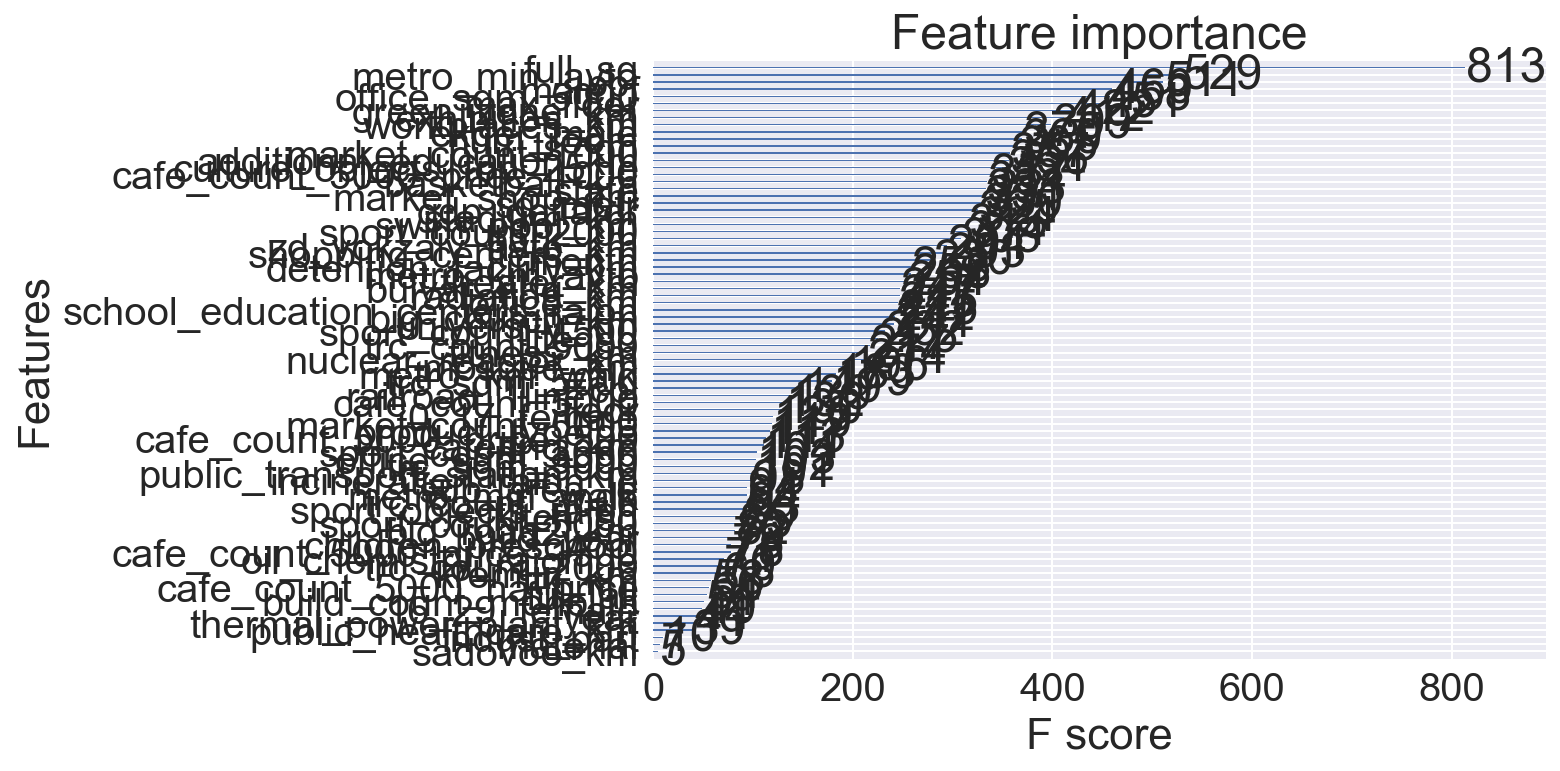

In [ ]:
%config InlineBackend.figure_format = 'retina'   # high resolution
xgb.plot_importance(sub_model)

In [1428]:
pd.DataFrame(sub_model.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)

feature  importance
13                      full_sq        1184
21                       male_f        1058
15                    mosque_km        1032
41                 big_road2_km         952
17  public_transport_station_km         936
26          sport_objects_raion         887
1                           ppi         858
32           children_preschool         853
27      additional_education_km         852
43                workplaces_km         838
37                green_zone_km         802
16                 trc_sqm_5000         773
20          shopping_centers_km         771
7                  swim_pool_km         769
25                  indust_part         763
23                      life_sq         724
42                big_church_km         712
6                      kitch_sq         703
38                basketball_km         697
39         build_count_monolith         663
3                         month         525
5                          year         517
12                    max_floor         502
40               market_shop_km         490
10                   build_year         447
9              sport_count_2000         394
14                        state         374
33              product_type_le         339
31        incineration_raion_le         297
24                  sub_area_le         285
36    culture_objects_top_25_le         238
0                  gdp_deflator         234
30                          cpi         209
34         public_healthcare_km         204
28       oil_chemistry_raion_le         172
11                        floor         149
18                 16_29_female         132
22            market_count_1000         121
4             railroad_1line_le          89
29                       ttk_km          68
2                      full_all          29
19                     material          25
8                   0_17_female          20
35                     num_room          14

In [ ]:
full_model = xgb.train(xgb_params,
                       dtrain1, 
                       num_boost_round=sub_model.best_iteration,
                       verbose_eval=20)

In [ ]:
log_y_pred = full_model.predict(dtest)
y_pred = np.exp(log_y_pred) - 1

In [1214]:
#log_y_pred = sub_model.predict(dtest)   # using partial model 15000 to predicrt
#y_pred = np.exp(log_y_pred) - 1

In [ ]:
submit = pd.DataFrame({'id': np.arange(30474,38136), 'price_doc': y_pred})
submit.to_csv('submissioncore83', index=False)

In [88]:
macroID= pd.read_csv('macroID.csv')
macroID=list(macroID['Predictor'])
macroID.remove('timestamp')

In [111]:
len(macroID)

100

In [1124]:
train_schema = pd.DataFrame(build_table_schema(train[corefeature])['fields'])

train_schema

name      type
0                         index   integer
1                           ppi    number
2                      full_all   integer
3             railroad_1line_le   integer
4                          year   integer
5                      kitch_sq    number
6                   sub_area_le   integer
7         incineration_raion_le   integer
8              sport_count_2000   integer
9                         floor    number
10                    max_floor    number
11                      full_sq    number
12                        state    number
13                    mosque_km    number
14                 trc_sqm_5000   integer
15                 swim_pool_km    number
16                     material    number
17          shopping_centers_km    number
18                   build_year    number
19              product_type_le   integer
20                      life_sq    number
21       oil_chemistry_raion_le   integer
22  public_transport_station_km    number
23               market_shop_km    number
24          sport_objects_raion   integer
25      additional_education_km    number
26                       ttk_km    number
27            market_count_1000   integer
28                          cpi    number
29           children_preschool   integer
30         public_healthcare_km    number
31                     num_room    number
32    culture_objects_top_25_le   integer
33                green_zone_km    number
34                basketball_km    number
35         build_count_monolith    number
36                  indust_part    number
37                 big_road2_km    number
38                big_church_km    number
39                workplaces_km    number
40                      density    number
41                         date  datetime
42               month_year_cnt   integer
43                week_year_cnt   integer
44                          dow   integer
45                    rel_floor    number
46                 rel_kitch_sq    number

In [91]:
macroID[77]='child_on_acc_pre_school_le'

In [92]:
macroID[80]='modern_education_share_le'

In [93]:
macroID[81]='old_education_build_share_le'

In [117]:
len(macroID)

99

In [116]:
macroID=list(set(macroID))

In [1335]:
key41= pd.read_csv('key40.csv')
key41=key41['0']
key41

0                         full_sq
1                         life_sq
2                           floor
3                       max_floor
4                        material
5                      build_year
6                        num_room
7                        kitch_sq
8                           state
9                 product_type_le
10                    sub_area_le
11           build_count_monolith
12           public_healthcare_km
13        additional_education_km
14                  workplaces_km
15                  big_church_km
16                      mosque_km
17                       full_all
18                         male_f
19                    0_17_female
20                   16_29_female
21                   big_road2_km
22                         ttk_km
23          incineration_raion_le
24         oil_chemistry_raion_le
25                  basketball_km
26                   swim_pool_km
27      culture_objects_top_25_le
28            sport_objects_raion
29            

In [1336]:
key41=list(set(key41))

In [1337]:

len(key41)

41

In [201]:
allpre=list(set(key40+macroID))
allpre

['micex_cbi_tr',
 'unemployment',
 'museum_visitis_per_100_cap',
 'retail_trade_turnover',
 'apartment_build',
 'month',
 'power_clinics',
 'rts',
 'pop_migration',
 'rent_price_3room_eco',
 'provision_doctors',
 'invest_fixed_assets',
 'balance_trade',
 'max_floor',
 'housing_fund_sqm',
 'heating_share',
 'mortality',
 'material',
 'micex_rgbi_tr',
 'gdp_annual_growth',
 'usdrub',
 'balance_trade_growth',
 'deposits_value',
 'sub_area_le',
 'market_shop_km',
 'public_healthcare_km',
 'big_church_km',
 'net_capital_export',
 'bandwidth_sports',
 'fixed_basket',
 'infant_mortarity_per_1000_cap',
 'railroad_1line_le',
 'modern_education_share_le',
 'year',
 'kitch_sq',
 'divorce_rate',
 'employment',
 'mortgage_rate',
 'brent',
 'profitable_enterpr_share',
 'load_on_doctors',
 'load_of_teachers_preschool_per_teacher',
 'income_per_cap',
 'build_count_monolith',
 'full_sq',
 'state',
 'load_of_teachers_school_per_teacher',
 'mosque_km',
 'theaters_viewers_per_1000_cap',
 'basketball_km',


In [410]:
corrmat = train[core1].corr()
c = corrmat.abs()
s = c.unstack()
type(s)
so = s.sort_values()
print so[-120:-34] # top 30 correlated features

pandas.core.series.Series

big_church_km                ttk_km                         0.715639
public_transport_station_km  workplaces_km                  0.716762
workplaces_km                public_transport_station_km    0.716762
additional_education_km      public_healthcare_km           0.718079
public_healthcare_km         additional_education_km        0.718079
additional_education_km      big_church_km                  0.723311
big_church_km                additional_education_km        0.723311
swim_pool_km                 public_transport_station_km    0.726876
public_transport_station_km  swim_pool_km                   0.726876
                             additional_education_km        0.728810
additional_education_km      public_transport_station_km    0.728810
state                        product_type_le                0.733931
product_type_le              state                          0.733931
rts                          year                           0.739066
year                         rts  

In [1338]:
core=list(set(key41+['cpi','ppi','gdp_deflator']))#'gdp_annual_growth','salary','deposits_value']))   #'gdp_deflator'
                                                  


In [1341]:
len(core)

44

In [1394]:
unwanted = {'month'}#'male_f','16_29_female','0_17_female'}   #'month', 
core43= [x for x in core if x not in unwanted]

In [1167]:
core44=core43+['kremlin_km']

In [1395]:
len(core43)

43

In [710]:
core1=list(set(core1))

In [269]:
core1=core1 + ['year']

In [338]:
core1

['gdp_deflator',
 'ppi',
 'year',
 'railroad_1line_le',
 'full_all',
 'kitch_sq',
 'incineration_raion_le',
 'sport_count_2000',
 'floor',
 'build_count_monolith',
 'max_floor',
 'full_sq',
 'state',
 'mosque_km',
 'trc_sqm_5000',
 'swim_pool_km',
 'oil_chemistry_raion_le',
 'shopping_centers_km',
 'build_year',
 'market_count_1000',
 'life_sq',
 'material',
 'indust_part',
 'public_transport_station_km',
 'culture_objects_top_25_le',
 'sport_objects_raion',
 'additional_education_km',
 'ttk_km',
 'product_type_le',
 'cpi',
 'children_preschool',
 'public_healthcare_km',
 'num_room',
 'green_zone_km',
 'sub_area_le',
 'market_shop_km',
 'big_road2_km',
 'big_church_km',
 'workplaces_km']

In [1296]:
train_na = (train.isnull().sum() / len(train)) * 100    # count the na in each column
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)  # get rid off empty

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

[<matplotlib.text.Text at 0x148cef310>, <matplotlib.text.Text at 0x138964f90>]

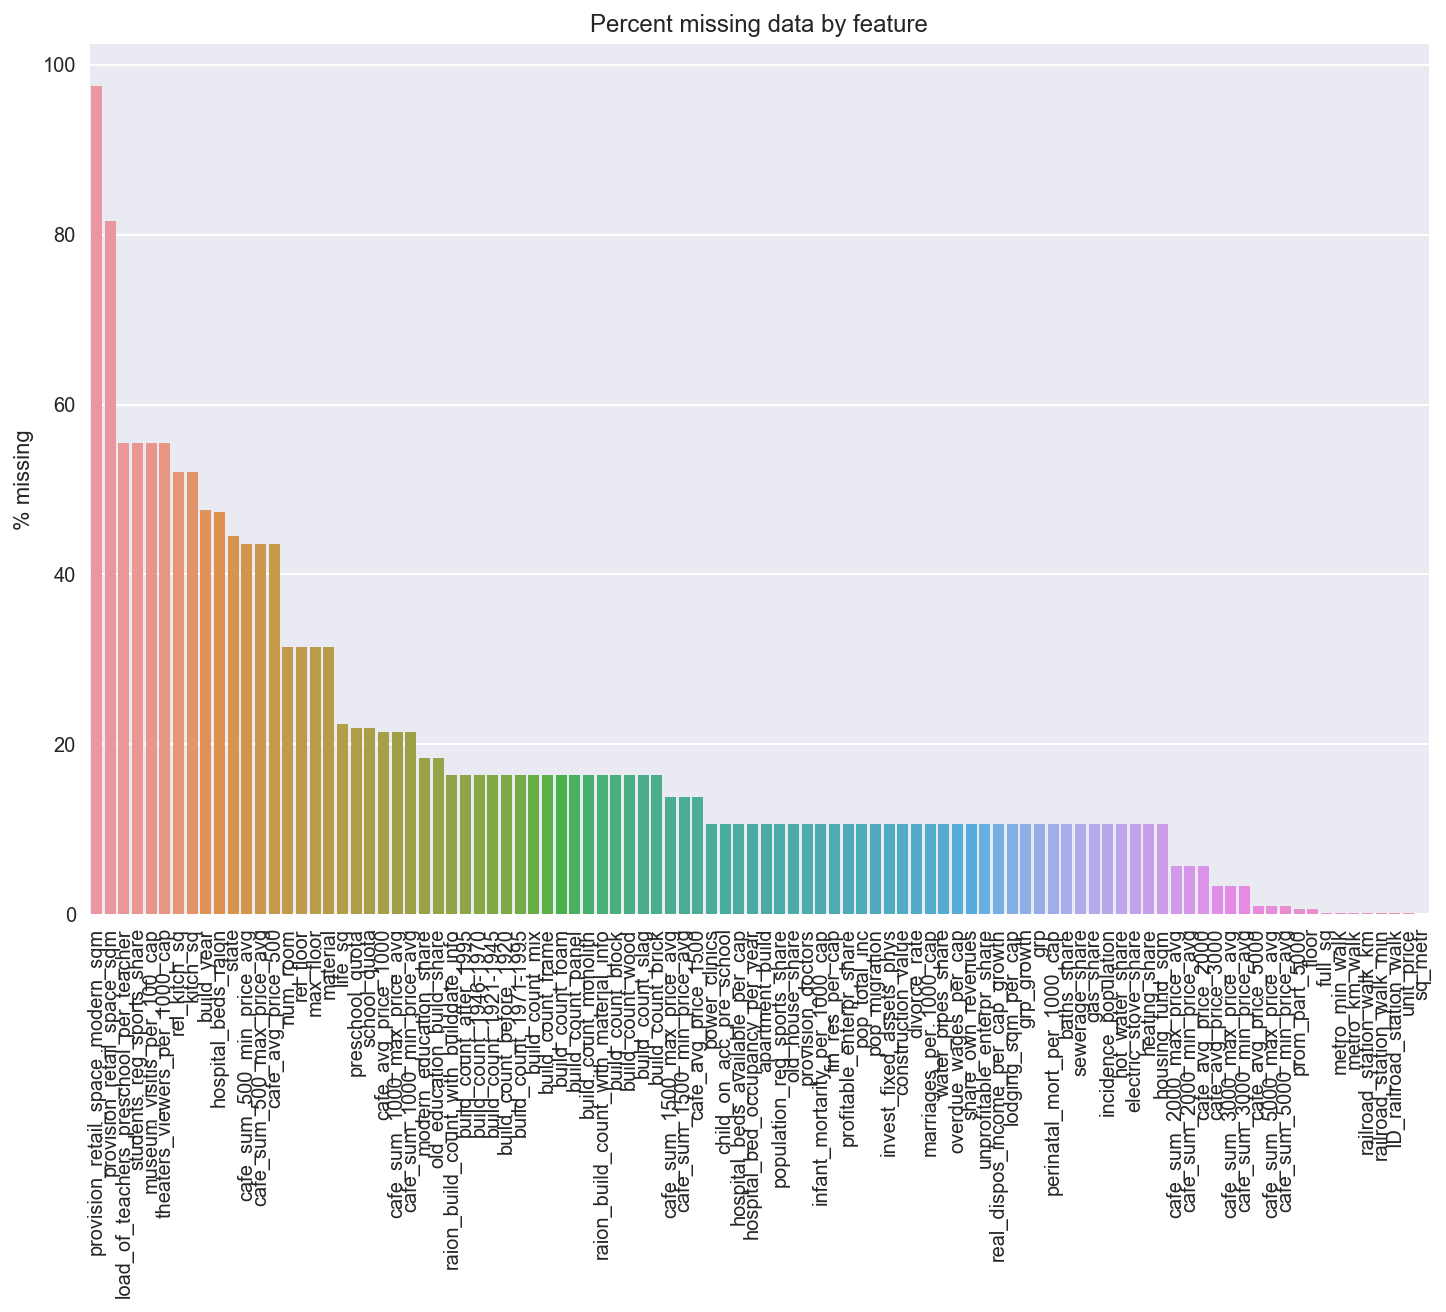

In [1297]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')

In [455]:
train.head()

timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0  2011-08-20     43.0     27.0    4.0        NaN       NaN         NaN   
1  2011-08-23     34.0     19.0    3.0        NaN       NaN         NaN   
2  2011-08-27     43.0     29.0    2.0        NaN       NaN         NaN   
3  2011-09-01     89.0     50.0    9.0        NaN       NaN         NaN   
4  2011-09-05     77.0     77.0    4.0        NaN       NaN         NaN   

   num_room  kitch_sq  state  product_type_le  sub_area_le  \
0       NaN       NaN    NaN                0            1   
1       NaN       NaN    NaN                0           27   
2       NaN       NaN    NaN                0           53   
3       NaN       NaN    NaN                0           25   
4       NaN       NaN    NaN                0           59   

   build_count_monolith  public_healthcare_km  additional_education_km  \
0                   2.0              0.974743                 0.947962   
1                   4.0              1.477723                 1.072315   
2                   4.0              0.097144                 0.391957   
3                  50.0              2.163735                 0.892674   
4                  16.0              1.121703                 0.810801   

   workplaces_km  big_church_km  mosque_km  full_all  male_f  0_17_female  \
0       0.884350       0.625783   3.932040     86206   40477        11317   
1       0.686252       0.967821   4.841544     76284   34200         8702   
2       1.510089       3.178751   7.922152    101982   46076         7063   
3       0.622272       1.031777  15.300449     21155    9828        15550   
4       0.892668       0.378756   2.584370     28179   13522         7124   

   16_29_female  big_road2_km     ttk_km  incineration_raion_le  \
0          8083      3.830951  10.918587                      0   
1          7593      3.103996   3.103996                      0   
2         10356      2.927487   2.927487                      0   
3          1842      2.780449  14.606501                      0   
4          2581      3.133531   1.721834                      0   

   oil_chemistry_raion_le  basketball_km  swim_pool_km  \
0                       0       3.516513      3.065047   
1                       0       1.161579      2.000154   
2                       0       1.952771      1.239304   
3                       0       4.923843      1.950317   
4                       0       0.307915      2.544696   

   culture_objects_top_25_le  sport_objects_raion  market_count_1000  \
0                          0                    7                  1   
1                          1                    6                  0   
2                          0                    5                  3   
3                          0                   17                  1   
4                          0                   25                  0   

   market_shop_km  indust_part  children_preschool  green_zone_km  \
0        1.676258     0.000070                9576       0.600973   
1        3.424716     0.049637                6880       0.065321   
2        1.375443     0.118537                5879       0.453172   
3        0.811275     0.069753               13087       0.106125   
4        1.969738     0.037316                5706       0.236214   

   public_transport_station_km  railroad_1line_le  shopping_centers_km  \
0                     0.274985                  0             0.648488   
1                     0.065263                  0             0.519311   
2                     0.328756                  0             1.486533   
3                     0.131597                  0             0.599914   
4                     0.071480                  1             0.429052   

   trc_sqm_5000  sport_count_2000  year  month  price_doc     unit_price  \
0       4036616                10  2011      8    5850000  136046.511628   
1       2034942                11  2011      8    6000000  176470.588235   

ValueError: max must be larger than min in range parameter.

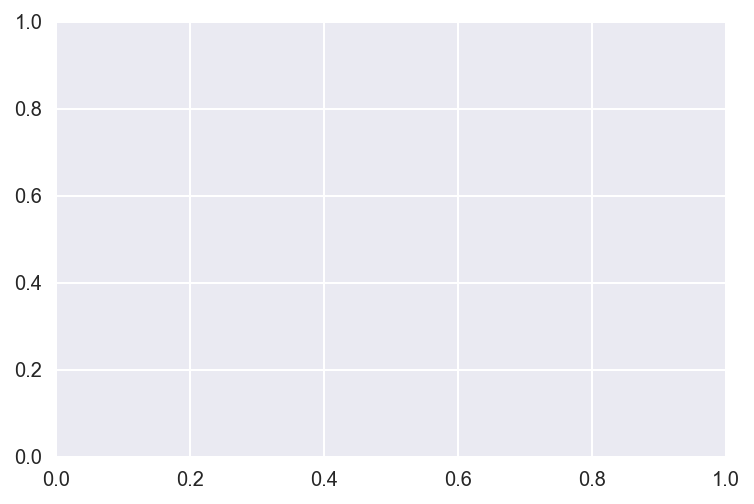

In [657]:
plt.hist(train.incidence_population)

In [488]:
train.loc[:, "heating_share"].hist

<bound method Series.hist_series of 0        99.9
1        99.9
2        99.9
3        99.9
4        99.9
5        99.9
6        99.9
7        99.9
8        99.9
9        99.9
10       99.9
11       99.9
12       99.9
13       99.9
14       99.9
15       99.9
16       99.9
17       99.9
18       99.9
19       99.9
20       99.9
21       99.9
22       99.9
23       99.9
24       99.9
25       99.9
26       99.9
27       99.9
28       99.9
29       99.9
30       99.9
31       99.9
32       99.9
33       99.9
34       99.9
35       99.9
36       99.9
37       99.9
38       99.9
39       99.9
40       99.9
41       99.9
42       99.9
43       99.9
44       99.9
45       99.9
46       99.9
47       99.9
48       99.9
49       99.9
50       99.9
51       99.9
52       99.9
53       99.9
54       99.9
55       99.9
56       99.9
57       99.9
58       99.9
59       99.9
60       99.9
61       99.9
62       99.9
63       99.9
64       99.9
65       99.9
66       99.9
67       99.9
68       99.

In [580]:
core2=core

In [582]:
core2.append('log_price_doc')

In [606]:
h=pd.DataFrame(train[core2].corr().log_price_doc)

In [610]:
h.log_price_doc.sort_values()

ttk_km                        -0.242921
basketball_km                 -0.219502
swim_pool_km                  -0.209700
workplaces_km                 -0.203174
big_church_km                 -0.199886
public_healthcare_km          -0.181221
shopping_centers_km           -0.180968
market_shop_km                -0.172520
additional_education_km       -0.160730
public_transport_station_km   -0.145775
mosque_km                     -0.143529
big_road2_km                  -0.142106
indust_part                   -0.067099
product_type_le               -0.057053
green_zone_km                 -0.053420
incineration_raion_le         -0.053156
railroad_1line_le             -0.027119
month                         -0.025299
oil_chemistry_raion_le        -0.023388
material                       0.014514
16_29_female                   0.015428
full_all                       0.018076
male_f                         0.018942
sub_area_le                    0.024913
build_year                     0.025765


In [611]:
macroID1=macroID

In [613]:
macroID1.append('log_price_doc')

In [828]:
corenew.append('log_price_doc')

In [829]:
h=pd.DataFrame(train[corenew].corr())

In [830]:
h.log_price_doc.sort_values()

zd_vokzaly_avto_km               -0.248749
sadovoe_km                       -0.246541
ttk_km                           -0.242921
kremlin_km                       -0.242420
bulvar_ring_km                   -0.242176
nuclear_reactor_km               -0.238365
basketball_km                    -0.219502
stadium_km                       -0.217347
metro_min_avto                   -0.212064
swim_pool_km                     -0.209700
detention_facility_km            -0.205710
workplaces_km                    -0.203174
exhibition_km                    -0.202851
catering_km                      -0.202159
metro_min_walk                   -0.201715
metro_km_walk                    -0.201715
thermal_power_plant_km           -0.199933
big_church_km                    -0.199886
office_km                        -0.195902
metro_km_avto                    -0.195466
university_km                    -0.195100
public_healthcare_km             -0.181221
shopping_centers_km              -0.180968
market_shop

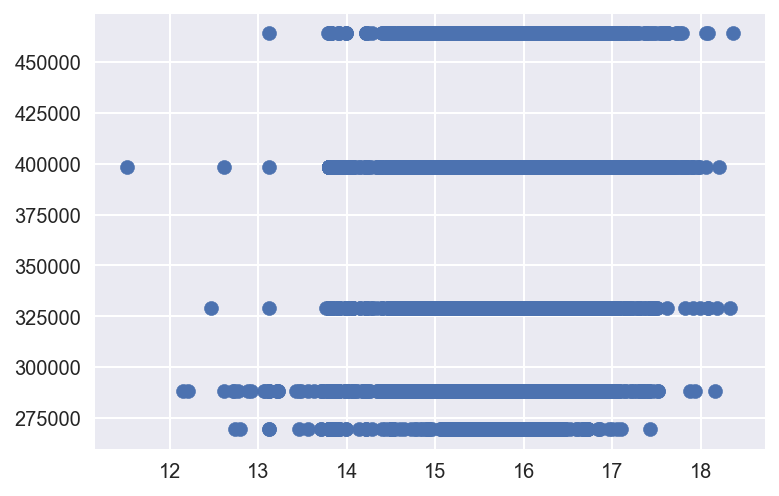

In [723]:
plt.scatter(train.log_price_doc ,train.bandwidth_sports )

# more features

In [870]:
trainold=pd.read_csv('train.csv')

In [871]:
trainold.shape

(30470, 298)

In [728]:
trainold.columns

Index([u'timestamp', u'full_sq', u'life_sq', u'floor', u'max_floor',
       u'material', u'build_year', u'num_room', u'kitch_sq', u'state',
       ...
       u'sport_count_5000', u'market_count_5000', u'price_doc', u'sq_metr',
       u'unit_price', u'log_price_doc', u'year', u'month', u'product_type_le',
       u'sub_area_le'],
      dtype='object', length=298)

In [1008]:
trainall.columns

Index([u'timestamp', u'full_sq', u'life_sq', u'floor', u'max_floor',
       u'material', u'build_year', u'num_room', u'kitch_sq', u'state',
       ...
       u'students_reg_sports_share', u'apartment_build', u'apartment_fund_sqm',
       u'child_on_acc_pre_school_le', u'modern_education_share_le',
       u'old_education_build_share_le', u'railroad_1line_le',
       u'incineration_raion_le', u'oil_chemistry_raion_le',
       u'culture_objects_top_25_le'],
      dtype='object', length=404)

In [1009]:
h1=pd.DataFrame(trainall[trainall.columns].corr())

In [1010]:
h1list=h1.log_price_doc.sort_values()

In [1011]:
h1list=pd.DataFrame(h1list)

In [1012]:
h1list.shape

(385, 1)

In [1439]:
h1list.to_csv('correlation.csv')

In [1019]:
top100=list(h1list.index[0:101])

In [1024]:
bottom100=list(h1list.index[-103:-4])

In [1025]:
bottom100

['rent_price_3room_bus',
 'usdrub',
 'office_count_1000',
 'rent_price_3room_eco',
 'floor',
 'eurrub',
 'trc_sqm_2000',
 'share_own_revenues',
 'employment',
 'unprofitable_enterpr_share',
 'cafe_count_500_price_1000',
 'population_reg_sports_share',
 'office_count_500',
 'micex_cbi_tr',
 'grp',
 'construction_value',
 'trc_count_1500',
 'retail_trade_turnover_per_cap',
 '0_6_male',
 'ppi',
 'mosque_count_5000',
 'children_preschool',
 '0_6_all',
 '0_6_female',
 'load_of_teachers_school_per_teacher',
 'young_male',
 '0_13_male',
 'retail_trade_turnover',
 'young_all',
 'leisure_count_5000',
 '0_13_all',
 'young_female',
 '0_17_male',
 '0_13_female',
 '7_14_male',
 'work_female',
 'market_count_3000',
 '0_17_all',
 'children_school',
 '7_14_all',
 'labor_force',
 '0_17_female',
 '7_14_female',
 'big_church_count_5000',
 'average_life_exp',
 'work_all',
 'shopping_centers_raion',
 'cafe_count_5000_price_4000',
 'office_sqm_1500',
 'work_male',
 'invest_fixed_capital_per_cap',
 'cpi',
 '

In [1026]:
core200=list(set(top100+bottom100))

In [1468]:
top25=list(h1list.index[0:26])

In [1469]:
bottom25=list(h1list.index[-29:-3])

In [1470]:
len(core)

44

In [736]:
core

['gdp_deflator',
 'ppi',
 'full_all',
 'month',
 'railroad_1line_le',
 'year',
 'kitch_sq',
 'sub_area_le',
 'incineration_raion_le',
 '0_17_female',
 'sport_count_2000',
 'male_f',
 'salary',
 'floor',
 'max_floor',
 'full_sq',
 'state',
 'mosque_km',
 'trc_sqm_5000',
 'swim_pool_km',
 '16_29_female',
 'material',
 'shopping_centers_km',
 'build_year',
 'product_type_le',
 'life_sq',
 'oil_chemistry_raion_le',
 'public_transport_station_km',
 'market_shop_km',
 'sport_objects_raion',
 'additional_education_km',
 'deposits_value',
 'ttk_km',
 'market_count_1000',
 'cpi',
 'children_preschool',
 'public_healthcare_km',
 'num_room',
 'culture_objects_top_25_le',
 'green_zone_km',
 'basketball_km',
 'build_count_monolith',
 'indust_part',
 'big_road2_km',
 'gdp_annual_growth',
 'big_church_km',
 'workplaces_km']

In [876]:
train=pd.read_csv('trainnew.csv')
test=pd.read_csv('testnew.csv')

In [877]:
train.shape
test.shape

(30470, 144)

(7662, 141)

In [1481]:
top=top20+bottom20

In [1471]:
top1=top25+bottom25

In [1472]:
s = set(core)
top1 = [x for x in top1 if x not in core]

In [1473]:
len(top1)

40

In [1465]:
top=list(set(top))

In [1476]:
core77=list(set(core+top1))

In [1482]:
core77=list(set(core77))
len(core77)
core84=core77
core84.remove('unit_price')

84

In [788]:
top.append('price_doc')

In [869]:
traintop1=trainold[top1]

In [878]:
train1=pd.concat([train, traintop1], axis=1)

In [879]:
train1.shape

(30470, 184)

In [880]:
train=train1

In [807]:
testold=pd.read_csv('test.csv')

In [881]:
testtop1=testold[top1]

In [882]:
test1=pd.concat([test, testtop1], axis=1)

In [883]:
test1.shape

(7662, 181)

In [884]:
test=test1

In [831]:
unwanted = {'month','male_f','16_29_female'}#'material','railroad_1line_le '}   #'month', 
corenew1 = [e for e in corenew if e not in unwanted]

In [ ]:
indust_part                      -0.067099
product_type_le                  -0.057053
green_zone_km                    -0.053420
incineration_raion_le            -0.053156
railroad_1line_le                -0.027119
month                            -0.025299
oil_chemistry_raion_le           -0.023388
material                          0.014514
16_29_female                      0.015428
full_all                          0.018076
male_f                            0.018942
sub_area_le                       0.024913
build_year                        0.025765
market_count_1000                 0.061007

In [900]:
len(core)

47

In [833]:
corenew1.remove('log_price_doc')

# more feature engineering

In [1101]:
#name conversion,they will be convert back
trainNew=train
testNew=test

In [1103]:
# add density
trainNew['density'] = trainNew['raion_popul'] / (trainNew['area_m']/1000000)
testNew['density'] = testNew['raion_popul'] / (testNew['area_m']/1000000)
trainNew['date']=pd.to_datetime(trainNew['timestamp'])  
testNew['date']=pd.to_datetime(testNew['timestamp'])  
 
# Add month-year
month_year = (trainNew.month + trainNew.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
trainNew['month_year_cnt'] = month_year.map(month_year_cnt_map)

month_year = (testNew.month + testNew.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
testNew['month_year_cnt'] = month_year.map(month_year_cnt_map)

 
#Add week-year count
week_year = (trainNew.date.dt.weekofyear + trainNew.date.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
trainNew['week_year_cnt'] = week_year.map(week_year_cnt_map)

week_year = (testNew.date.dt.weekofyear + testNew.date.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
testNew['week_year_cnt'] = week_year.map(week_year_cnt_map)

# Add month and day-of-week 
trainNew['dow'] = trainNew.date.dt.dayofweek
testNew['dow'] = testNew.date.dt.dayofweek
       
# Other feature engineering
trainNew['rel_floor'] = trainNew['floor'] / trainNew['max_floor'].astype(float)
testNew['rel_floor'] = testNew['floor'] / testNew['max_floor'].astype(float)


trainNew['rel_kitch_sq'] = trainNew['kitch_sq'] / trainNew['full_sq'].astype(float)
testNew['rel_kitch_sq'] = testNew['kitch_sq'] / testNew['full_sq'].astype(float)


In [1104]:
trainNew.shape
testNew.shape

(30470, 411)

(7662, 408)

In [1128]:
train=trainNew
test=testNew

In [1125]:
feature=['density','month_year_cnt','week_year_cnt','dow','rel_floor','rel_kitch_sq']

In [1072]:
les=['full_sq','ttk_km','public_transport_station_min_walk','year','full_all','workplaces_km']

In [1126]:
corefeature=core39+feature

In [1127]:
len(corefeature)

45

In [1346]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1351]:
train['timestamp'].value_counts()[:19]

2014-12-16    160
2014-12-09    147
2014-06-30    133
2014-12-18    118
2014-11-25     93
2014-09-30     92
2014-12-08     87
2014-12-03     86
2014-12-17     84
2014-12-01     83
2014-12-02     82
2014-11-21     82
2014-10-31     79
2014-12-20     79
2014-12-15     79
2014-12-12     78
2014-06-27     78
2014-11-13     77
2014-10-29     77
Name: timestamp, dtype: int64

In [1235]:
h=train['timestamp'].value_counts()[:110].index

In [1352]:
h1=train['timestamp'].value_counts()[20:].index

In [1353]:
h=list(h)
h1=list(h1)

In [1233]:
h=train['timestamp'].value_counts()

In [1259]:
type(h)

list

In [1252]:
y=train['timestamp']

In [1354]:
traintrimhigh= train[train['timestamp'].isin(h1)]     #.isin([3, 6])]    df[df['A'].isin([3, 6])]

In [1355]:
traintrimhigh.shape

(28601, 404)

In [1356]:
train=traintrimhigh

In [ ]:
[e for e in corenew if e not in unwanted]

In [1243]:
train110

timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
12665  2013-12-02     64.0     64.0   14.0       17.0       4.0      2014.0   
12666  2013-12-02     45.0     28.0    3.0        9.0       1.0      1970.0   
12667  2013-12-02     78.0     78.0    2.0       17.0       1.0      2002.0   
12668  2013-12-02     40.0     22.0    2.0       14.0       5.0      1974.0   
12669  2013-12-02     39.0     20.0   10.0       14.0       1.0      1986.0   
12670  2013-12-02     36.0     36.0    8.0        9.0       5.0      1966.0   
12671  2013-12-02     43.0     32.0    3.0        5.0       2.0      1960.0   
12672  2013-12-02     56.0     31.0   10.0       17.0       1.0      1983.0   
12673  2013-12-02     44.0     28.0    4.0        9.0       1.0      1971.0   
12674  2013-12-02     41.0     20.0    4.0       14.0       1.0      1986.0   
12675  2013-12-02     38.0     19.0   15.0       17.0       1.0      1994.0   
12676  2013-12-02     45.0     27.0    6.0        9.0       1.0      1975.0   
12677  2013-12-02     45.0     30.0    4.0        5.0       5.0      1962.0   
12678  2013-12-02     65.0     46.0    6.0       16.0       1.0      1975.0   
12679  2013-12-02     35.0     19.0   10.0       12.0       5.0      1970.0   
12680  2013-12-02     51.0     30.0    2.0       14.0       1.0      1994.0   
12681  2013-12-02     40.0     21.0    4.0       14.0       1.0      1995.0   
12682  2013-12-02     75.0     43.0    6.0       17.0       1.0         NaN   
12683  2013-12-02     66.0     43.0   10.0       12.0       5.0      1973.0   
12684  2013-12-02     45.0     28.0    5.0        5.0       1.0      1966.0   
12685  2013-12-02     79.0     75.0    2.0       17.0       1.0      2013.0   
12686  2013-12-02     40.0     38.0    6.0       12.0       1.0         NaN   
12687  2013-12-02     85.0      NaN    9.0       25.0       1.0         NaN   
12688  2013-12-02     66.0     44.0   12.0       12.0       5.0      1968.0   
12689  2013-12-02     77.0      NaN    9.0        9.0       1.0         NaN   
12690  2013-12-02     34.0     16.0    1.0        9.0       2.0      1968.0   
12691  2013-12-02     36.0     21.0    4.0        9.0       1.0      1974.0   
12692  2013-12-02     35.0     20.0    9.0       12.0       5.0      1970.0   
12693  2013-12-02     80.0     45.0   17.0       17.0       1.0      2004.0   
12694  2013-12-02     82.0     48.0    5.0       14.0       1.0      1995.0   
12695  2013-12-02     34.0     22.0   11.0       12.0       1.0         NaN   
12696  2013-12-02     51.0      NaN    3.0       17.0       1.0         NaN   
12697  2013-12-02     73.0     43.0   10.0       17.0       1.0      1984.0   
12698  2013-12-02     81.0     43.0    8.0       17.0       1.0      1993.0   
12699  2013-12-02     38.0      NaN    5.0       12.0       4.0      2013.0   
12700  2013-12-02    112.0     87.0    5.0        5.0       2.0      1959.0   
12701  2013-12-02     61.0     38.0    8.0        9.0       1.0      1972.0   
12702  2013-12-02     36.0     18.0    6.0       16.0       1.0      2007.0   
12703  2013-12-02    119.0      NaN    9.0        0.0       1.0         NaN   
12704  2013-12-02     58.0      NaN   14.0        1.0       6.0      2013.0   
12705  2013-12-02     35.0     19.0    3.0       12.0       5.0      1971.0   
12706  2013-12-02    137.0     89.0    1.0        3.0       1.0      2013.0   
12707  2013-12-02     60.0     48.0    2.0       15.0       2.0      2014.0   
12708  2013-12-02     59.0     32.0   14.0       17.0       1.0      2011.0   
12709  2013-12-02     43.0     25.0    7.0        9.0       2.0      1969.0   
12710  2013-12-02     46.0     29.0    5.0        9.0       1.0      1971.0   
12711  2013-12-02     37.0     19.0    3.0       17.0       1.0      1998.0   
12712  2013-12-02     55.0     22.0   17.0       22.0       4.0      2012.0   
12713  2013-12-02     67.0     66.0    6.0       12.0       5.0      1973.0   
12714  2013-12-02    116.0     65.0    6.0       10.0     

In [1268]:
train110.tail()

timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
30465  2015-06-30     44.0     27.0    7.0        9.0       1.0      1975.0   
30466  2015-06-30     86.0     59.0    3.0        9.0       2.0      1935.0   
30467  2015-06-30     45.0      NaN   10.0       20.0       1.0         NaN   
30468  2015-06-30     64.0     32.0    5.0       15.0       1.0      2003.0   
30469  2015-06-30     43.0     28.0    1.0        9.0       1.0      1968.0   

       num_room  kitch_sq  state   product_type              sub_area  \
30465       2.0       6.0    3.0     Investment              Otradnoe   
30466       4.0      10.0    3.0     Investment              Tverskoe   
30467       1.0       NaN    1.0  OwnerOccupier  Poselenie Vnukovskoe   
30468       2.0      11.0    2.0     Investment          Obruchevskoe   
30469       2.0       6.0    2.0     Investment           Novogireevo   

             area_m  raion_popul  green_zone_part  indust_part  \
30465  1.005305e+07       175518         0.096270     0.300323   
30466  7.307411e+06        75377         0.065444     0.000078   
30467  2.553630e+07         4001         0.496315     0.007122   
30468  6.050065e+06        78616         0.167526     0.093443   
30469  4.395333e+06        94561         0.063755     0.038693   

       children_preschool  preschool_quota  preschool_education_centers_raion  \
30465                9753           5088.0                                  4   
30466                4237           1874.0                                  4   
30467                 275              NaN                                  0   
30468                4215           2372.0                                  6   
30469                6120           2215.0                                  4   

       children_school  school_quota  school_education_centers_raion  \
30465            10311       12721.0                               4   
30466             6398        6772.0                               4   
30467              264           NaN                               0   
30468             4635        6083.0                               8   
30469             6533        5824.0                               4   

       school_education_centers_top_20_raion  hospital_beds_raion  \
30465                                      0                  NaN   
30466                                      1               1046.0   
30467                                      0                  NaN   
30468                                      0               3300.0   
30469                                      0               1015.0   

       healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
30465                         1                        0                   10   
30466                         3                        2                   29   
30467                         0                        0                    0   
30468                         2                        1                   11   
30469                         2                        0                    7   

       additional_education_raion culture_objects_top_25  \
30465                           3                     no   
30466                          16                    yes   
30467                           0                     no   
30468                           1                     no   
30469                           1                     no   

       culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
30465                             0                       9             6   
30466                            10                      23           141   
30467                             0                       1             0   
30468                             0                       4             5   
30469                             0                       5             1   

      thermal_power_plant_raion incineration_raion 

# EDA

NameError: global name 'pd' is not defined

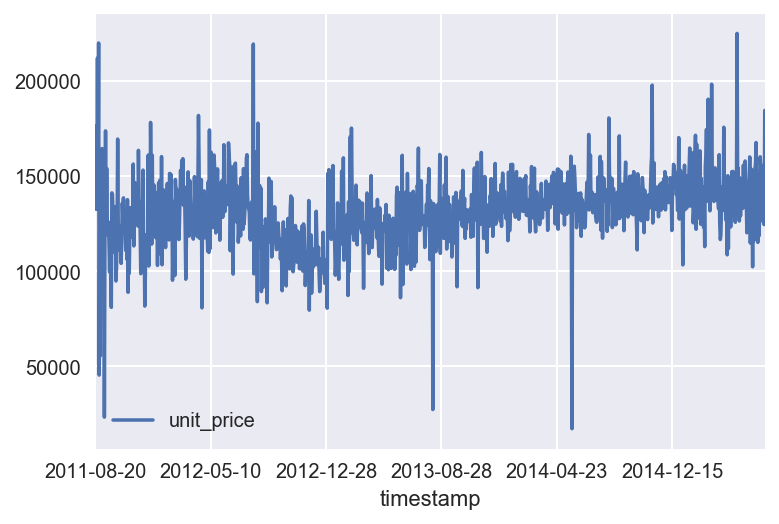

In [1283]:
vis.timeseries_plot(train, val='unit_price', by='day')
vis.timeseries_plot(train, val='unit_price', by='weekday')    
vis.timeseries_plot(train, val='unit_price', by='month')    
vis.timeseries_plot(train, val='unit_price', by='year') 
vis.timeseries_plot(train, val='unit_price', by='%Y-%m') 

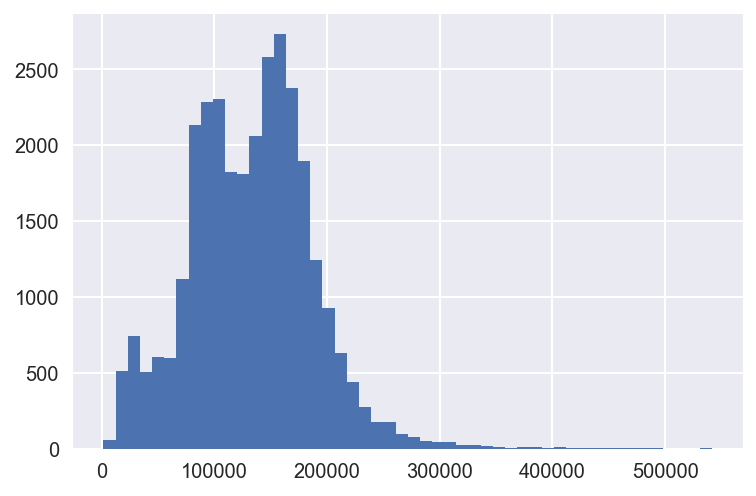

In [1295]:
%config InlineBackend.figure_format = 'retina' 
train.loc[:, "unit_price"].hist(bins=50)
ax.set(title='Price by area in sq meters', xlabel='Area', ylabel='Price')

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

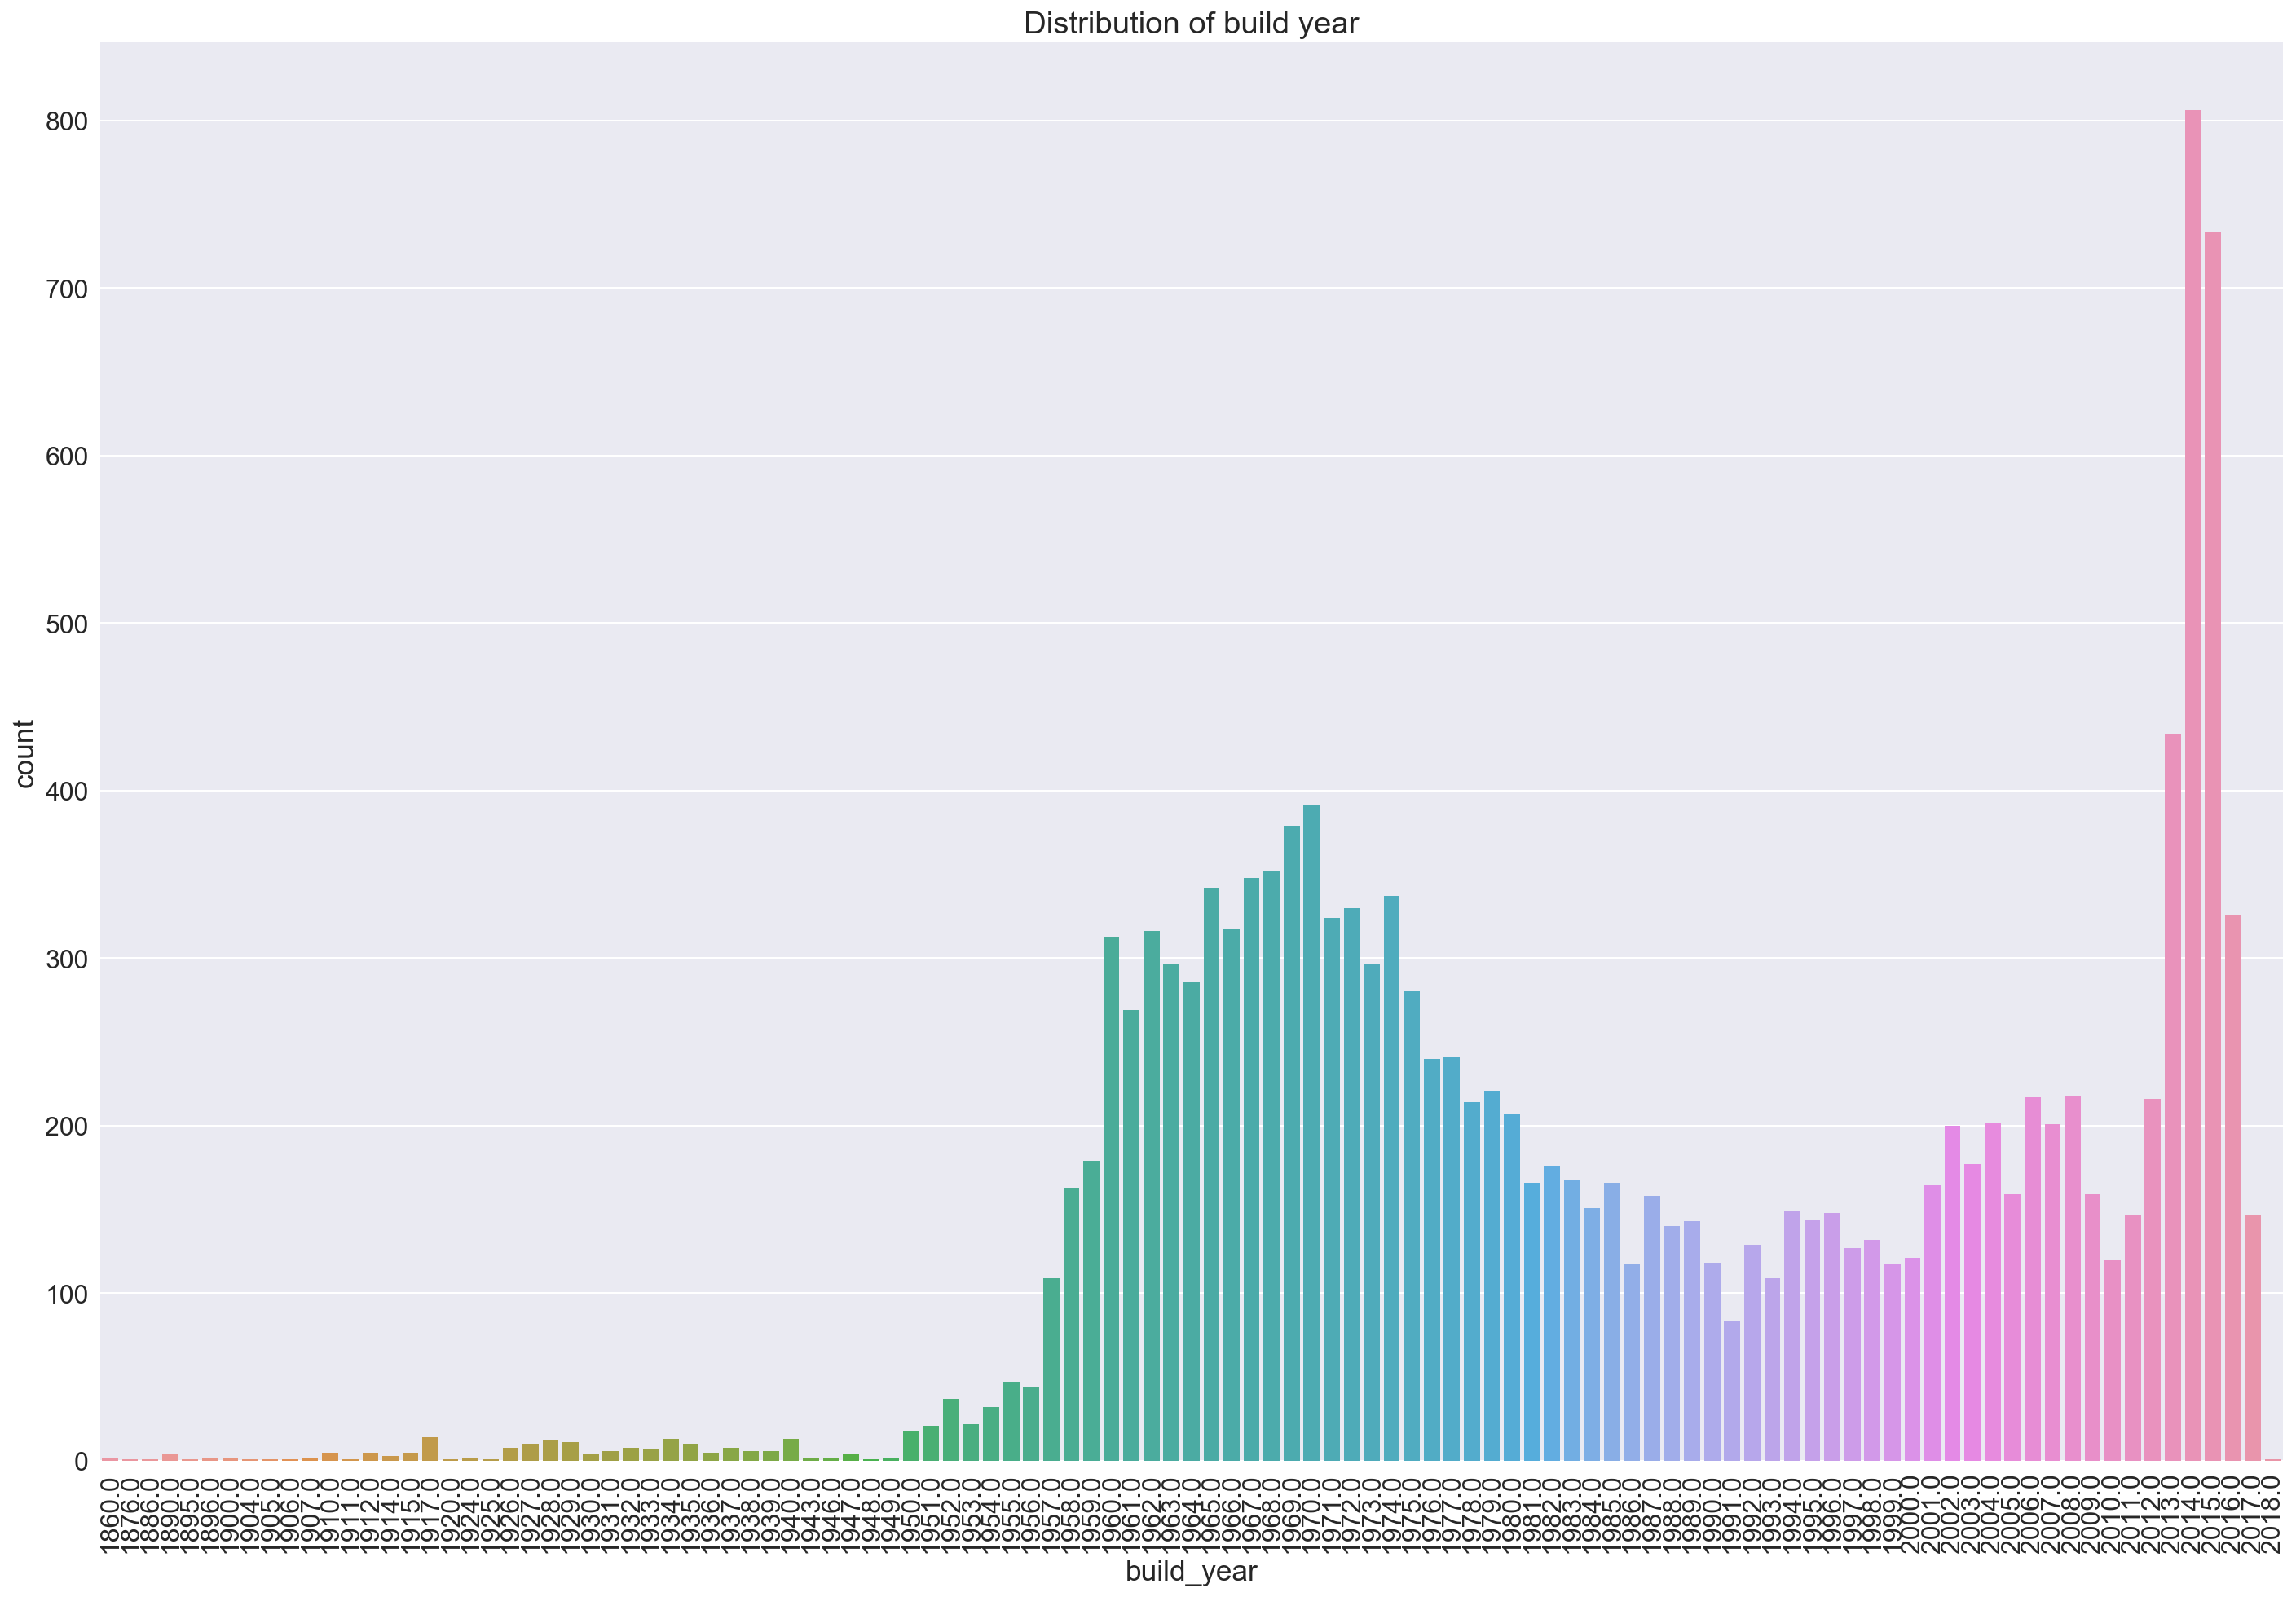

In [1374]:
sns.set(font_scale=1.6)
f, ax = plt.subplots(figsize=(24, 16))
plt.xticks(rotation='90')
#ind = train_df[(train_df['build_year'] <= 1691) | (train_df['build_year'] >= 2018)].index
by_df = train.sort_values(by=['build_year'])
sns.countplot(x=by_df['build_year'])
ax.set(title='Distribution of build year')

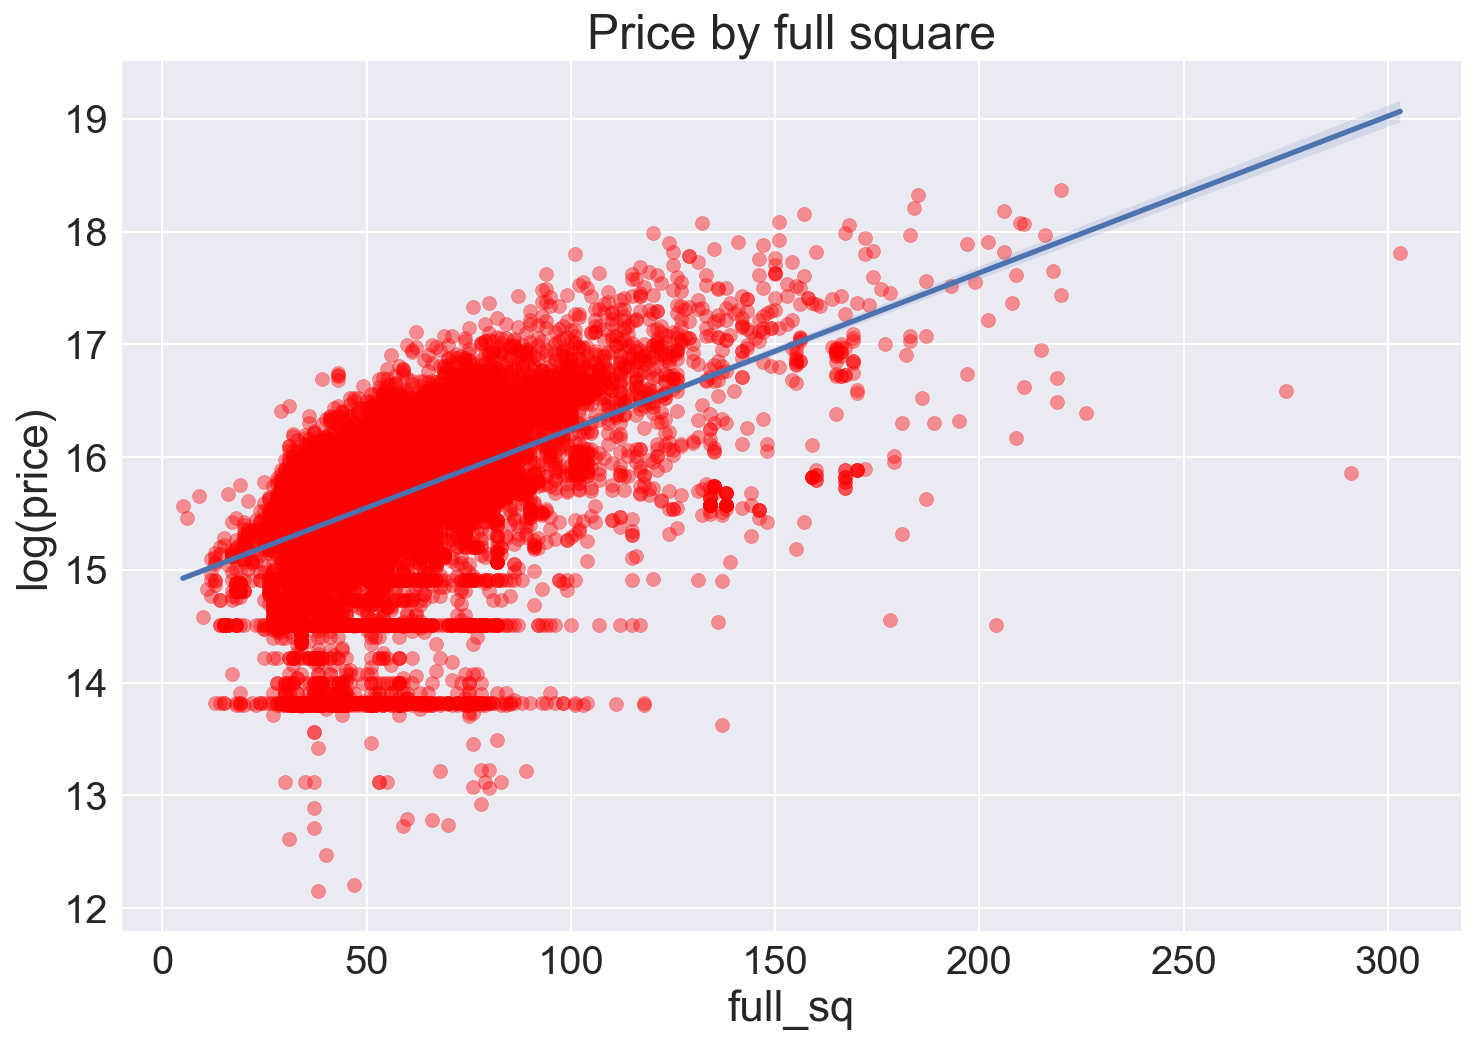

In [1371]:
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=train['full_sq'], y=train['log_price_doc'], c='r', alpha=0.4)
sns.regplot(x="full_sq", y="log_price_doc", data=train, scatter=False, truncate=True)
ax.set(title='Price by full square', xlabel='full_sq', ylabel='log(price)')

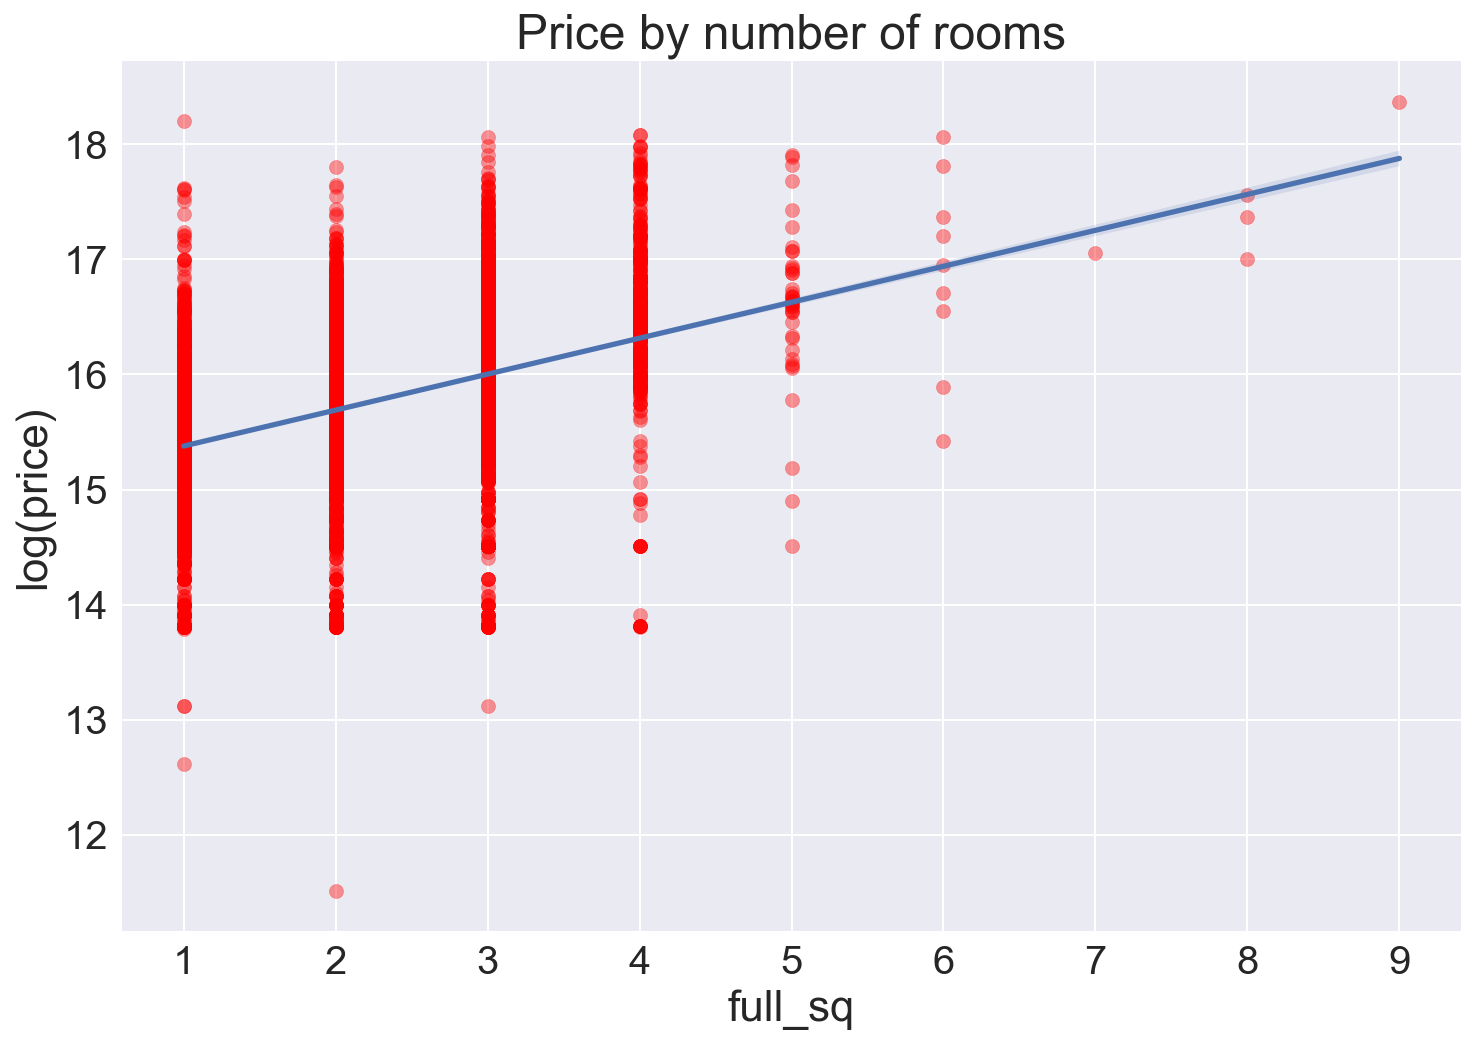

In [1433]:
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=train['num_room'], y=train['log_price_doc'], c='r', alpha=0.4)
sns.regplot(x="num_room", y="log_price_doc", data=train, scatter=False, truncate=True)
ax.set(title='Price by number of rooms', xlabel='full_sq', ylabel='log(price)')

In [1308]:
len(train['timestamp'].value_counts())

1161

<Container object of 1161 artists>

<Container object of 274 artists>

[<matplotlib.text.Text at 0x146f4ab50>, <matplotlib.text.Text at 0x1428f8990>]

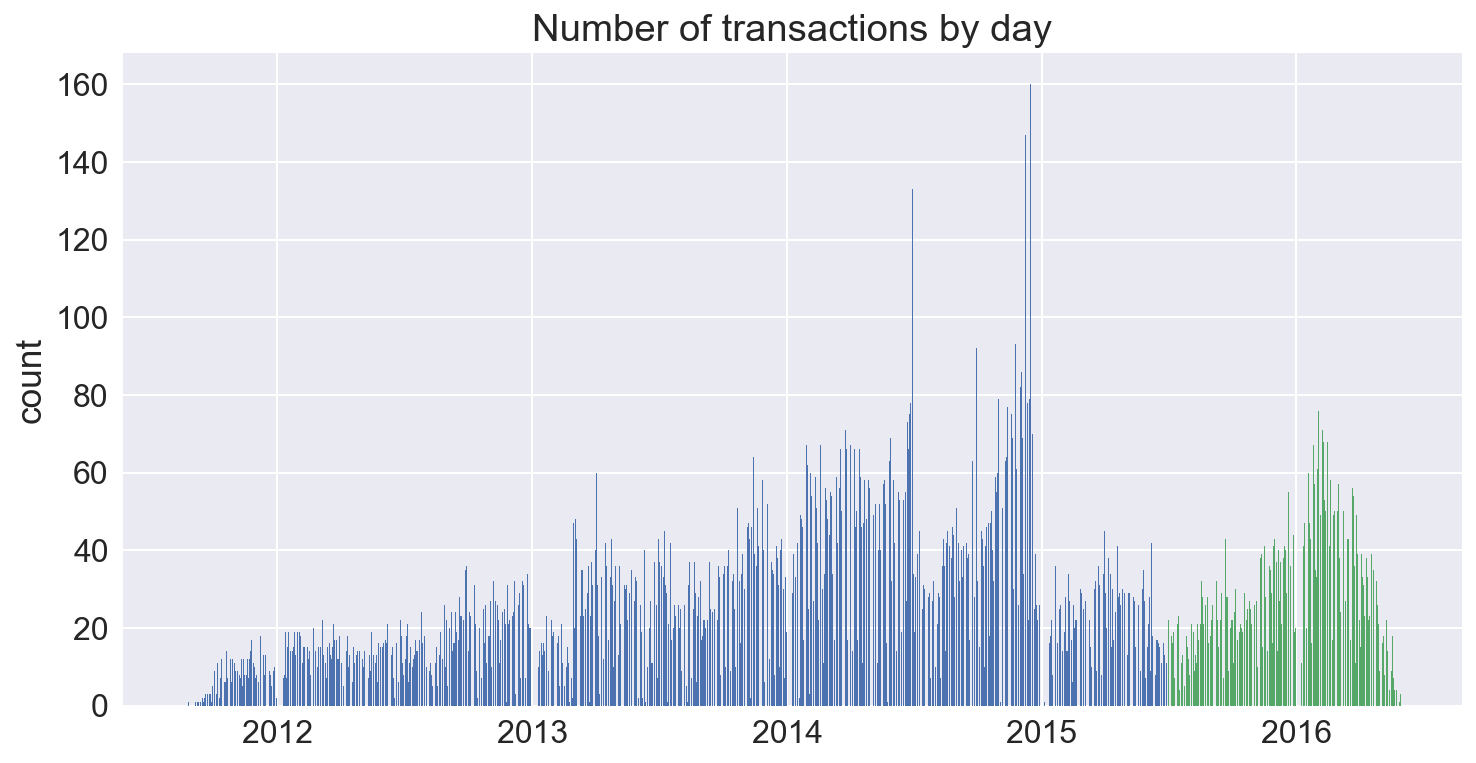

In [1420]:
import datetime
import matplotlib.dates as mdates
train['date']=pd.to_datetime(train['timestamp'])  
test['date']=pd.to_datetime(test['timestamp'])  
years = mdates.YearLocator()   # every year
yearsFmt = mdates.DateFormatter('%Y')
ts_vc_train = train['date'].value_counts()
ts_vc_test = test['date'].value_counts()
f, ax = plt.subplots(figsize=(12, 6))
plt.bar(left=ts_vc_train.index, height=ts_vc_train)
plt.bar(left=ts_vc_test.index, height=ts_vc_test)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.set(title='Number of transactions by day', ylabel='count')

In [1332]:
len(test['timestamp'].value_counts())

274

In [ ]:
ttk_km                        -0.242921
basketball_km                 -0.219502
swim_pool_km                  -0.209700
workplaces_km                 -0.203174
big_church_km                 -0.199886
public_healthcare_km          -0.181221
shopping_centers_km           -0.180968
market_shop_km                -0.172520
additional_education_km       -0.160730
public_transport_station_km   -0.145775
mosque_km                     -0.143529
big_road2_km                  -0.142106
indust_part                   -0.067099
product_type_le               -0.057053
green_zone_km                 -0.053420
incineration_raion_le         -0.053156
railroad_1line_le             -0.027119
month                         -0.025299
oil_chemistry_raion_le        -0.023388
material                       0.014514
16_29_female                   0.015428
full_all                       0.018076
male_f                         0.018942
sub_area_le                    0.024913
build_year                     0.025765
market_count_1000              0.061007
state                          0.092211
max_floor                      0.097483
build_count_monolith           0.101006
culture_objects_top_25_le      0.105657
floor                          0.117881
ppi                            0.130358
children_preschool             0.131307
0_17_female                    0.136404
cpi                            0.141047
gdp_deflator                   0.145539
year                           0.147507
sport_objects_raion            0.196474
trc_sqm_5000                   0.210336
sport_count_2000               0.213205
kitch_sq                       0.219312
life_sq                        0.359526
num_room                       0.438277
full_sq                        0.488597
log_price_doc                  1.000000

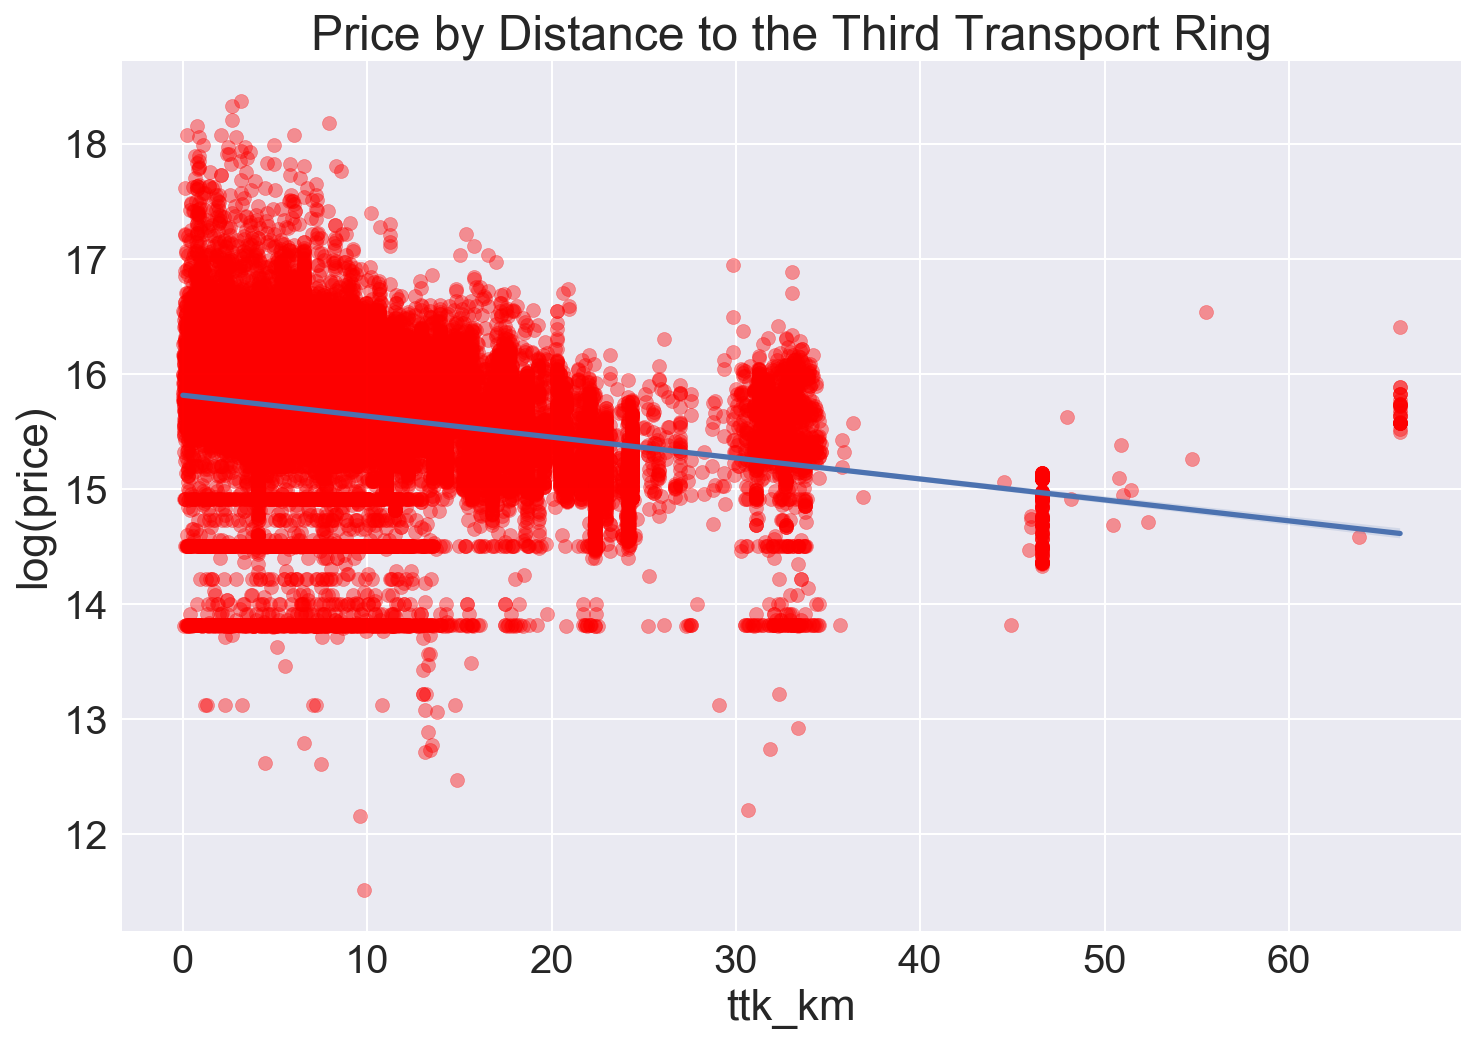

In [1438]:
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=train['ttk_km'], y=train['log_price_doc'], c='r', alpha=0.4)
sns.regplot(x="ttk_km", y="log_price_doc", data=train, scatter=False, truncate=True)
ax.set(title='Price by Distance to the Third Transport Ring', xlabel='ttk_km', ylabel='log(price)')

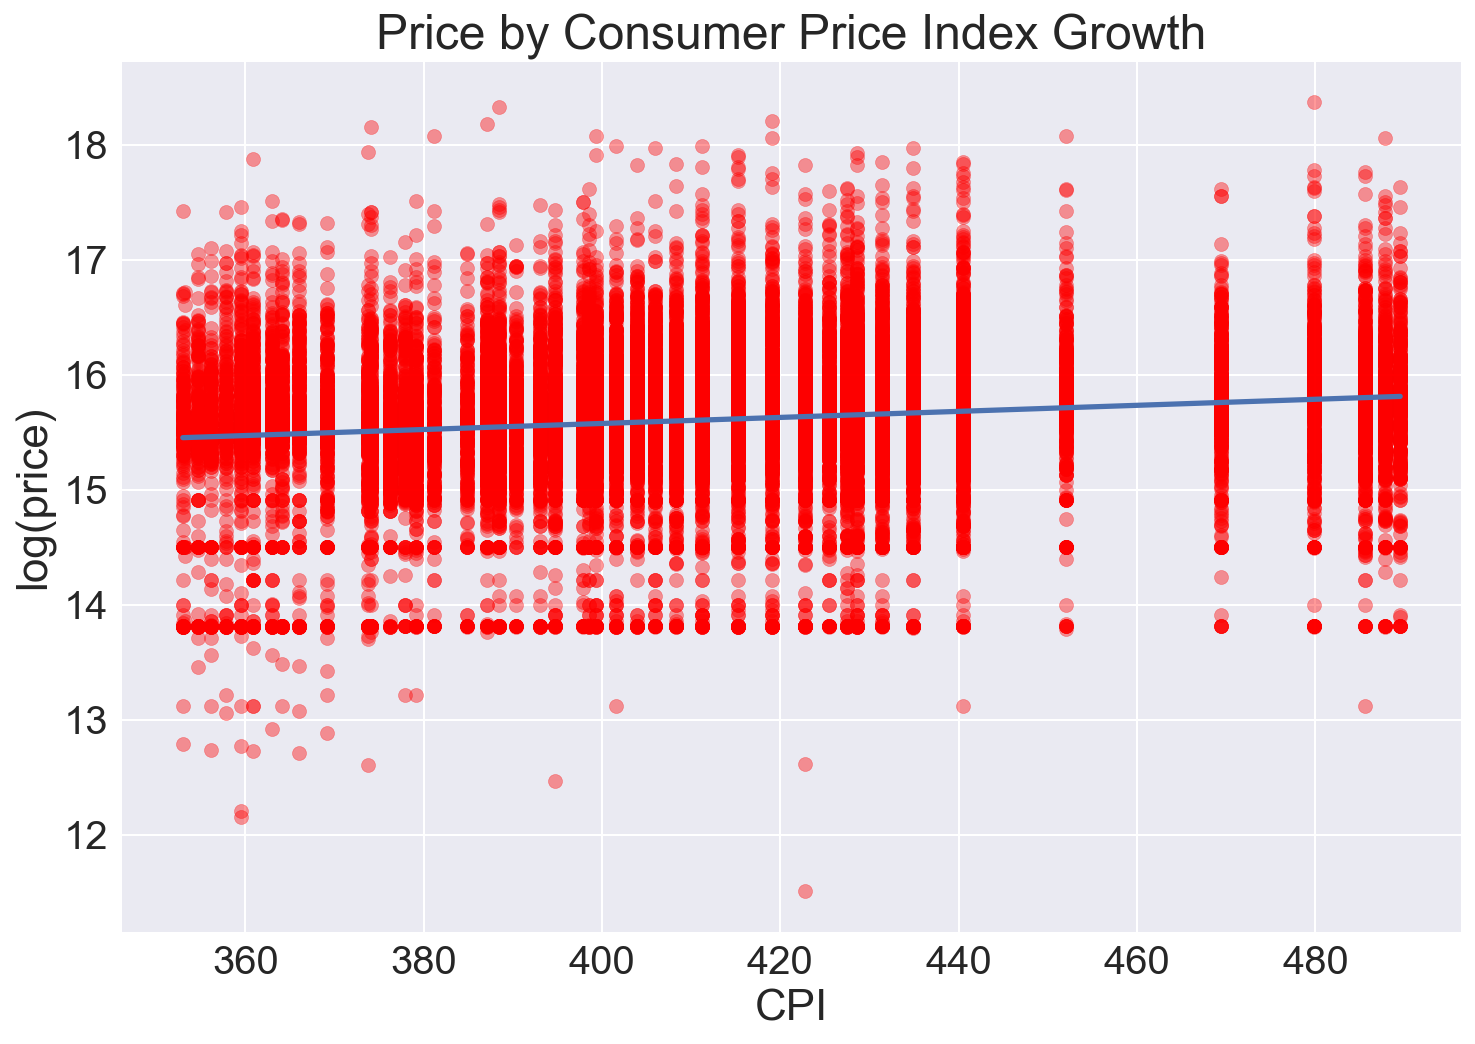

In [1441]:
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=train['cpi'], y=train['log_price_doc'], c='r', alpha=0.4)
sns.regplot(x="cpi", y="log_price_doc", data=train, scatter=False, truncate=True)
ax.set(title='Price by Consumer Price Index Growth', xlabel='CPI', ylabel='log(price)')

In [ ]:
zd_vokzaly_avto_km,-0.248749036175
sadovoe_km,-0.246540808696
ttk_km,-0.24292149903
0_17_female
year                           0.147507
sport_objects_raion            0.196474
trc_sqm_5000                   0.210336

kitch_sq                       0.219312

num_room                       0.438277
full_sq                        0.488597

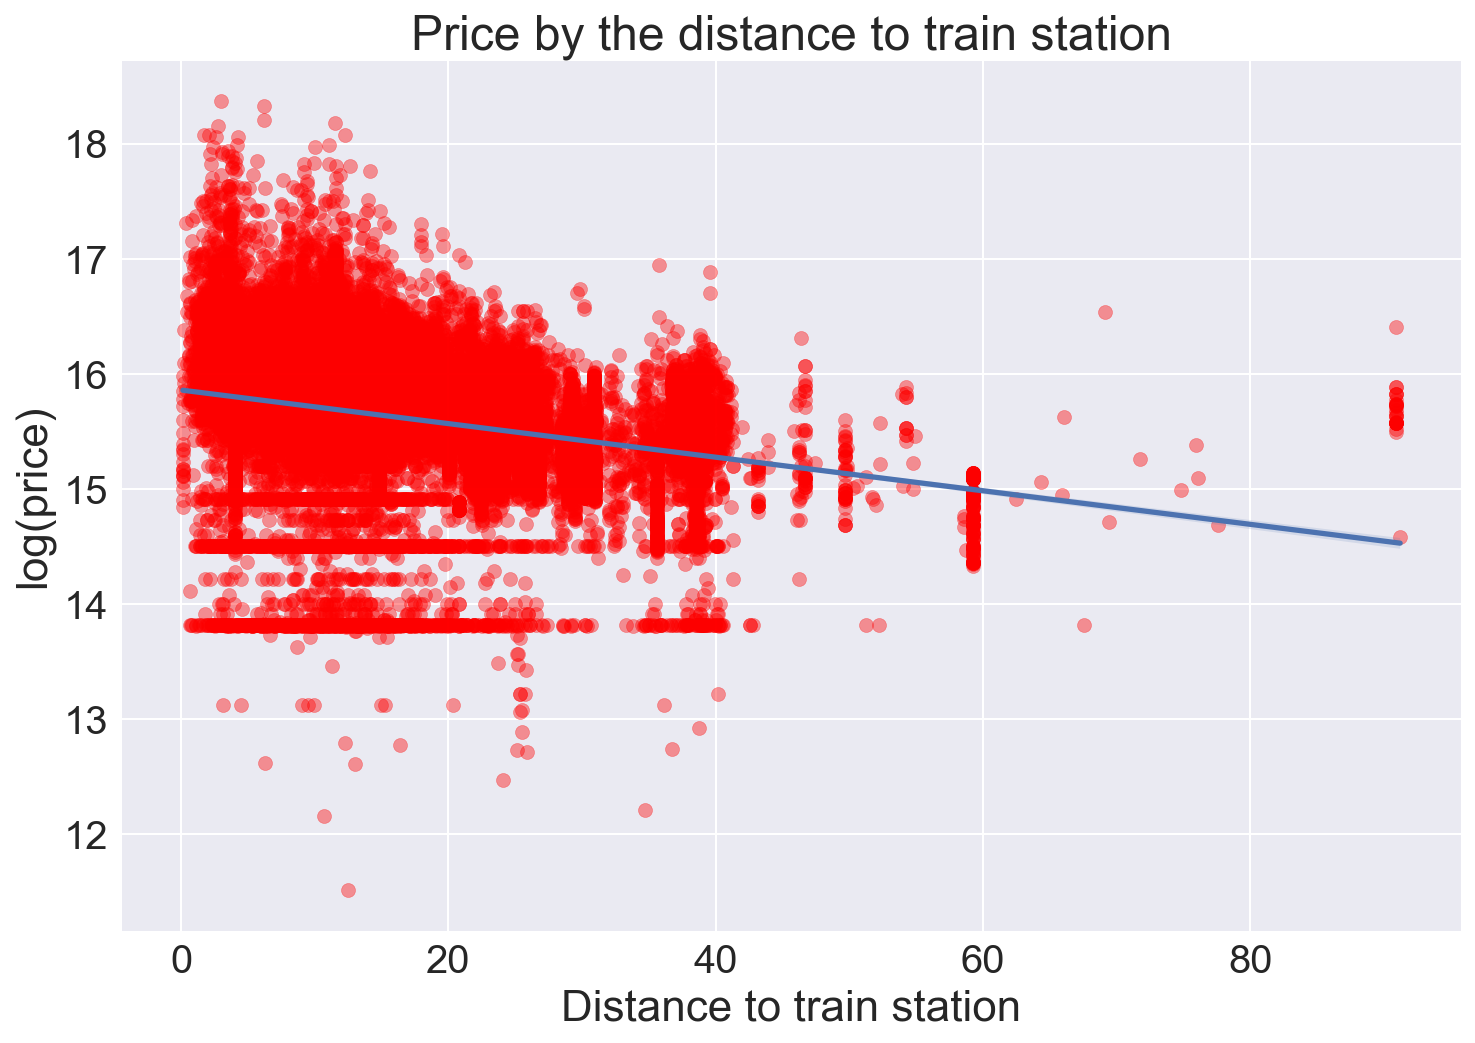

In [1443]:
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=train['zd_vokzaly_avto_km'], y=train['log_price_doc'], c='r', alpha=0.4)
sns.regplot(x="zd_vokzaly_avto_km", y="log_price_doc", data=train, scatter=False, truncate=True)
ax.set(title='Price by the distance to train station', xlabel='Distance to train station', ylabel='log(price)')

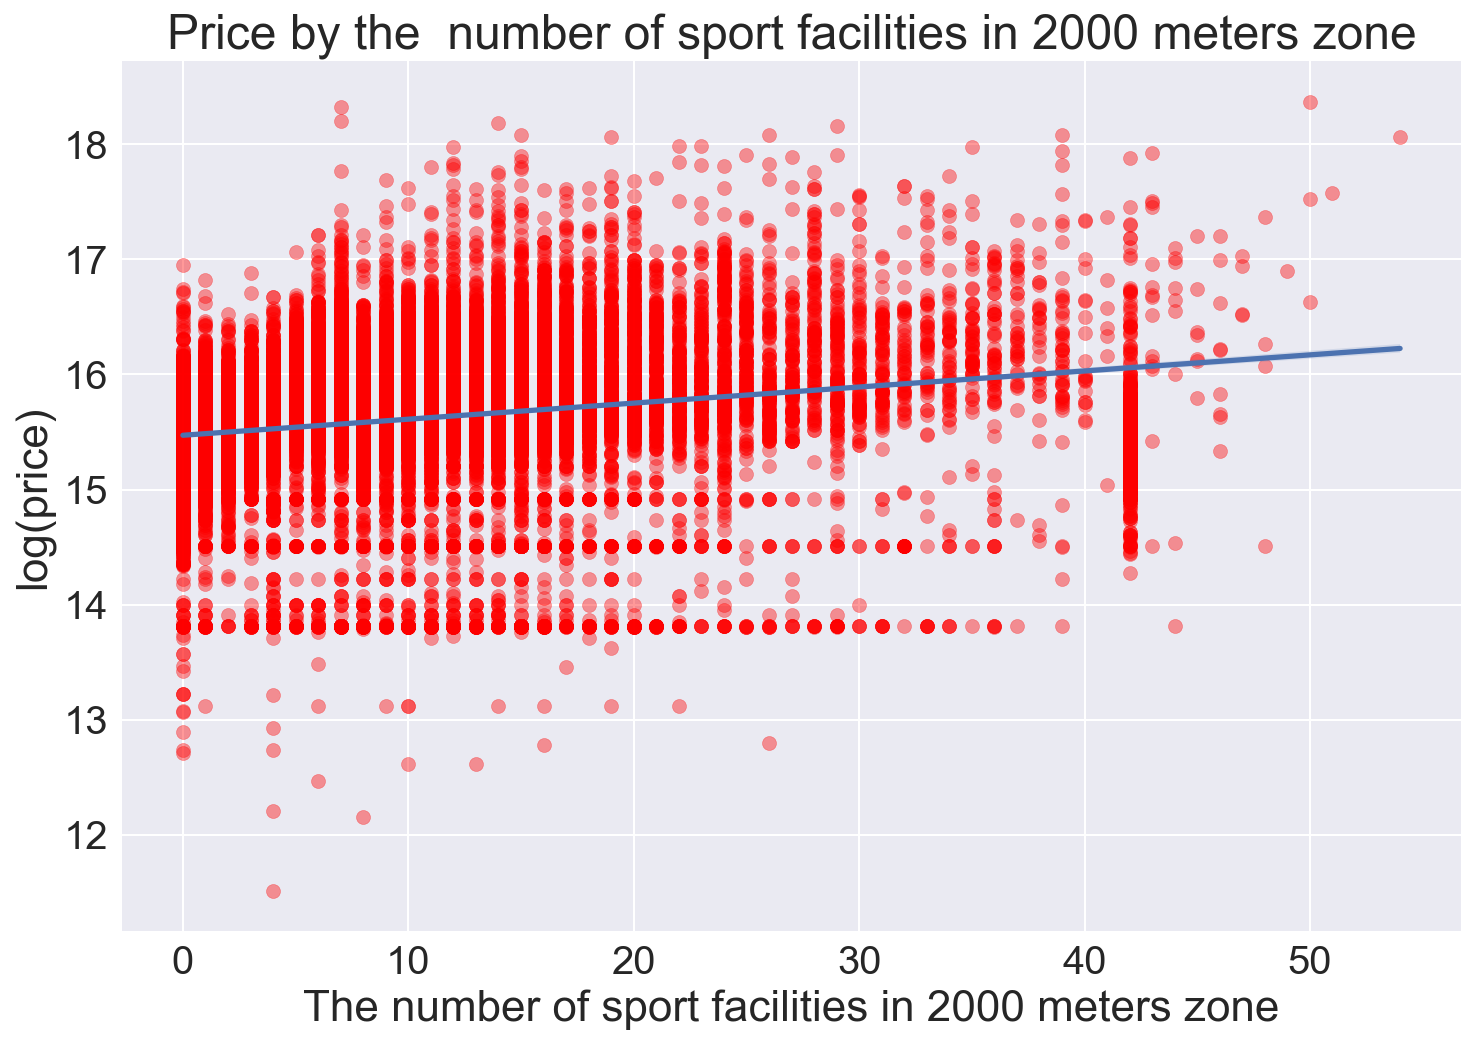

In [1447]:
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=train['sport_count_2000'], y=train['log_price_doc'], c='r', alpha=0.4)
sns.regplot(x="sport_count_2000", y="log_price_doc", data=train, scatter=False, truncate=True)
ax.set(title='Price by the  number of sport facilities in 2000 meters zone', xlabel='The number of sport facilities in 2000 meters zone', ylabel='log(price)')